# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
  - The demand for used cars in the Indian market is huge these days.
Because new car sales  have slowed. Recently, the used car market has continued to grow in recent years and is now bigger than the new car market.
  - Cars4U needs help with pricing of the used cars due to OEM not setting that market it does not set the price instead by supply and demand.
  - additionally price is affected by Several factors, including mileage, brand, model, year, etc. can influence the actual worth of a car.

### **The objective:**

 - What is the intended goal?
  - Come up with a pricing model that can effectively predict the price of used cars and can help the
business in devising profitable strategies using differential pricing


### **The key questions:**

- What are the key questions that need to be answered?
  - Are you aiming for accurate price estimation or relative ranking of car prices?
  - what values do we have for to explore on the dataset? for example Numerical Data like mileage, car age, engine size etc and also possible categorical data like car make and model.
  - What variable types do we have? Is it a continuous variable that requires regression models? or classify prices into categories for classification models ?
  - Are there any limitation on variables? For example acceptable highest mileage to be 500,000 for 10 year old cars.
  - What dataset do we have? What is the size? Is the data large enough for modeling? Is the data reliable and with less or no error in the values?
  - What are the relationships between variables to explain the predicted prices?
  - Are there any specific time considerations? For example Seasons in which car are sold the most like summer? Or movie trend to get a van for vanlife?



### **The problem formulation**:

- What is it that we are trying to solve using data science?
 - Price Estimation - Find out what a car should be priced at typically
 - Outlier Detection - Remove any outlier of the price of a due to rare exception.
 - Market Insights - What the value of different brands are valued at and what is more in demand. Like may be a Toyota corolla is not frequently sold but the value is higher than a comparable vehicle by different Brand due to Brand value of Toyota.
 - Model Evaluation - What model would most accurate to predict price and what model would identify demand might be different. So Evaluate and improve the model for more accuracy.
 - Comparative Analysis - What different brands and models are valued at and how it can help buyer to judge which is better value for money.
 - Also identify which variables have a greater impact on pricing going up or down for a given car.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [303]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [304]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

from tabulate import tabulate
import re

### **Let us load the data**

In [305]:
dataset = pd.read_csv("/content/drive/MyDrive/GreatLearnings/Capstone/used_cars.csv")

## Data Overview

- Observations
- Sanity checks

In [306]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [307]:
print(f"dataset shape: Records {dataset.shape[0]} with columns {dataset.shape[1]} of fields")

dataset shape: Records 7253 with columns 14 of fields


In [308]:
dataset.describe().round(2)

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.00,7253.00,7253.00,7251.00,7207.00,7078.00,7200.00,1006.00,6019.00
mean,3626.00,2013.37,58699.06,18.14,1616.57,112.77,5.28,22.78,9.48
std,2093.91,3.25,84427.72,4.56,595.29,53.49,0.81,27.76,11.19
min,0.00,1996.00,171.00,0.00,72.00,34.20,2.00,3.91,0.44
25%,1813.00,2011.00,34000.00,15.17,1198.00,75.00,5.00,7.88,3.50
50%,3626.00,2014.00,53416.00,18.16,1493.00,94.00,5.00,11.57,5.64
75%,5439.00,2016.00,73000.00,21.10,1968.00,138.10,5.00,26.04,9.95
max,7252.00,2019.00,6500000.00,33.54,5998.00,616.00,10.00,375.00,160.00


In [309]:
dataset.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')

In [310]:
dataset.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_price            float64
Price                float64
dtype: object

In [311]:
dataset.Fuel_Type.value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [312]:
dataset.Transmission.value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

In [313]:
dataset.Owner_Type.value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [314]:
# cars by year table
dataset.Year.value_counts()

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

In [315]:
# number cars based on number of seats
dataset.Seats.value_counts()

5.0     6048
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

In [316]:
dataset.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


**Field Descriptions**: The following are the observation of the fields in the dataset

- **S.No.**: integer number always a unique number representing an index number
- **Name**: name of the case with make and model
- **Location**: vehilde Location city/town in india
- **Year**: integer representing year model of the car in YYYY format
- **Kilometers_Driven**: Integer of the total kilometers driven inthe car by the previous owner(s) in KM
- **Fuel_Type**: there are only 5 different values Petrol,Diesel, Electric, CNG and LPG
- **Transmission**: Manual or automatic transmission
- **Owner_Type**: How many previous owner were where for the vehicle First, Second,Third and Fourth & Above
- **Mileage**: Float value for rthe standard mileage offered by the car companyin KMPL or KM/KG
- **Engine**: Integer of the displacement volume of the engine in CC
- **Power**: float value for Brake horse Power of the engine
- **Seats**: number of seats in the car per person
- **New_price**: The price of a new car of the same modelin INR 100,000
- **Price**: The price of the used car in INR 100,000



In [317]:
dataset.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


In [318]:
# remove S.No. which seems to be index value

dataset.drop( 'S.No.', axis=1, inplace=True )
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


In [319]:
# check null values
# check if there is any nulls
(dataset.isnull().sum() / dataset.shape[0])*100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 2.412795
Seats                 0.730732
New_price            86.129877
Price                17.013650
dtype: float64

**Observations**:

- new_price and price have highested null values
- the car name can be split by make, model, and special features
- the owner_type we can use number to represent how many prior owner with max of 4.
- We can use regression to fill the null values for new price but not sure if we can do so for power, seats, mileage and engine.

**Next Action Steps:**
- create different datasets for data with remove records with null, remove specific records with specific vairable being null and vanilla dataset.
- use data analysis to find which values to remove.
- create 3 new columns with the make, model and features
- create new colum for previous_owners with number value of owner_type as 1,2,3,4.

In [320]:
def convert_owner_type(owner_type):
  owners = {
      "First":1,
      "Second":2,
      "Third":3,
      "Fourth & Above":4
      }
  return owners[owner_type]

dataset["Previous_Owner"] = dataset["Owner_Type"].apply(convert_owner_type)

In [321]:
dataset.describe().round(2)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner
count,7253.00,7253.00,7251.00,7207.00,7078.00,7200.00,1006.00,6019.00,7253.00
mean,2013.37,58699.06,18.14,1616.57,112.77,5.28,22.78,9.48,1.20
std,3.25,84427.72,4.56,595.29,53.49,0.81,27.76,11.19,0.46
min,1996.00,171.00,0.00,72.00,34.20,2.00,3.91,0.44,1.00
25%,2011.00,34000.00,15.17,1198.00,75.00,5.00,7.88,3.50,1.00
50%,2014.00,53416.00,18.16,1493.00,94.00,5.00,11.57,5.64,1.00
75%,2016.00,73000.00,21.10,1968.00,138.10,5.00,26.04,9.95,1.00
max,2019.00,6500000.00,33.54,5998.00,616.00,10.00,375.00,160.00,4.00


In [322]:
dataset[['Make', 'Model']] = dataset['Name'].str.split(' ', 1, expand=True)
dataset['Model'] = dataset['Model'].str.strip()
dataset['Make'] = dataset['Make'].str.lower()
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner,Make,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,1,maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,1,hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,1,honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,1,maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,2,audi,A4 New 2.0 TDI Multitronic


In [323]:
dataset.Make.value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Make, dtype: int64

In [324]:
dataset.Model.value_counts().head(11)

XUV500 W8 2WD          55
Swift VDI              49
Swift Dzire VDI        42
City 1.5 S MT          39
Swift VDI BSIV         37
Ritz VDi               35
Fortuner 3.0 Diesel    35
Amaze S i-Dtech        32
Grand i10 Sportz       32
City 1.5 V MT          32
Brio S MT              32
Name: Model, dtype: int64

In [325]:
dataset.Name.value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [326]:
dataset.Location.value_counts()

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [327]:
# Check the correlation between numerical features
# dataset.corr().round(3)
correlation = dataset.corr()
print(tabulate(correlation.round(3), headers=['', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price', 'Previous_Owners'], tablefmt="fancy_grid"))

╒═══════════════════╤════════╤═════════════════════╤═══════════╤══════════╤═════════╤═════════╤═════════════╤═════════╤═══════════════════╕
│                   │   Year │   Kilometers_Driven │   Mileage │   Engine │   Power │   Seats │   New_price │   Price │   Previous_Owners │
╞═══════════════════╪════════╪═════════════════════╪═══════════╪══════════╪═════════╪═════════╪═════════════╪═════════╪═══════════════════╡
│ Year              │  1     │              -0.188 │     0.322 │   -0.055 │   0.013 │   0.008 │      -0.059 │   0.305 │            -0.395 │
├───────────────────┼────────┼─────────────────────┼───────────┼──────────┼─────────┼─────────┼─────────────┼─────────┼───────────────────┤
│ Kilometers_Driven │ -0.188 │               1     │    -0.069 │    0.095 │   0.03  │   0.091 │      -0.008 │  -0.011 │             0.093 │
├───────────────────┼────────┼─────────────────────┼───────────┼──────────┼─────────┼─────────┼─────────────┼─────────┼───────────────────┤
│ Mileage           

In [328]:
numerical_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
numerical_stats = dataset[numerical_cols].describe()
print(tabulate(numerical_stats, headers=numerical_cols,tablefmt="fancy_grid"))

# Summary statistics for categorical variables
categorical_cols = ['Name','Year','Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Make', 'Model']
categorical_stats = dataset[categorical_cols].describe()
print(tabulate(categorical_stats, tablefmt="fancy_grid"))

# Number of unique observations in each category of categorical columns
unique_counts = dataset[categorical_cols].nunique()
print(tabulate(unique_counts.items(),tablefmt="fancy_grid"))
# print(unique_counts)

# Extreme values in different columns

extreme_values = {
    'Kilometers_Driven': dataset['Kilometers_Driven'].max(),
    'Mileage': dataset['Mileage'].max(),
    'Engine': dataset['Engine'].max(),
    'Power': dataset['Power'].max(),
    'Seats': dataset['Seats'].max(),
    'Price': dataset['Price'].max()
}
print(tabulate(extreme_values.items(),tablefmt="fancy_grid"))

╒═══════╤═════════════════════╤═══════════╤══════════╤═══════════╤═════════════╤════════════╕
│       │   Kilometers_Driven │   Mileage │   Engine │     Power │       Seats │      Price │
╞═══════╪═════════════════════╪═══════════╪══════════╪═══════════╪═════════════╪════════════╡
│ count │          7253       │ 7251      │ 7207     │ 7078      │ 7200        │ 6019       │
├───────┼─────────────────────┼───────────┼──────────┼───────────┼─────────────┼────────────┤
│ mean  │         58699.1     │   18.1416 │ 1616.57  │  112.765  │    5.28042  │    9.47947 │
├───────┼─────────────────────┼───────────┼──────────┼───────────┼─────────────┼────────────┤
│ std   │         84427.7     │    4.5622 │  595.285 │   53.4936 │    0.809277 │   11.1879  │
├───────┼─────────────────────┼───────────┼──────────┼───────────┼─────────────┼────────────┤
│ min   │           171       │    0      │   72     │   34.2    │    2        │    0.44    │
├───────┼─────────────────────┼───────────┼──────────┼──────

In [329]:
# summary statistics for categorical variables
dataset.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Make,Model
count,7253,7253,7253,7253,7253,7253,7253
unique,2041,11,5,2,4,32,2041
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,maruti,XUV500 W8 2WD
freq,55,949,3852,5204,5952,1444,55


In [330]:
# Count the number of unique observations in each category of categorical columns
categorical_cols = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
dataset[categorical_cols].nunique()

Name            2041
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
dtype: int64

In [331]:
# Count the number of unique observations in each category of numerical columns
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price']
dataset[numerical_cols].nunique()

Year                   23
Kilometers_Driven    3660
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

In [332]:
# Identify extreme values in numerical columns
dataset.describe(percentiles=[0.01, 0.99]).round(2)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner
count,7253.00,7253.00,7251.00,7207.00,7078.00,7200.00,1006.00,6019.00,7253.00
mean,2013.37,58699.06,18.14,1616.57,112.77,5.28,22.78,9.48,1.20
std,3.25,84427.72,4.56,595.29,53.49,0.81,27.76,11.19,0.46
min,1996.00,171.00,0.00,72.00,34.20,2.00,3.91,0.44,1.00
1%,2004.00,4074.16,0.00,796.00,38.40,4.00,4.02,0.90,1.00
50%,2014.00,53416.00,18.16,1493.00,94.00,5.00,11.57,5.64,1.00
99%,2019.00,173480.00,28.09,2996.00,282.00,8.00,128.00,56.00,3.00
max,2019.00,6500000.00,33.54,5998.00,616.00,10.00,375.00,160.00,4.00


In [333]:
# Check for missing values
null_counts = dataset.isnull().sum()

print(null_counts)

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
Previous_Owner          0
Make                    0
Model                   0
dtype: int64


In [334]:
dataset[(dataset['Kilometers_Driven'] > 500000)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner,Make,Model
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,NaN,7.5,1,skoda,Octavia Ambition Plus 2.0 TDI AT
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.9,5.0,NaN,2.7,1,hyundai,i10 Magna 1.2
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,5.9,1,volkswagen,Vento Diesel Highline
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0,1,bmw,X5 xDrive 30d M Sport


- BMW X5 xDrive 30d M Sport drove 6500000 whichj seems to be a value too high of a value to normal condition. This can we removed as an outlier)

In [335]:
dataset.drop(index=2328, inplace=True)

In [336]:
dataset[(dataset['Kilometers_Driven'] < 1000)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner,Make,Model
1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7,796.0,47.3,5.0,NaN,3.60,1,maruti,Alto 800 2016-2019 VXI
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.5,1197.0,81.8,5.0,6.8,6.25,1,maruti,Wagon R ZXI AMT 1.2


In [337]:
dataset[(dataset['Mileage'].isnull())]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner,Make,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,1,mahindra,E Verito D4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,1,toyota,Prius 2009-2016 Z4


- Being the only electric vehicle in the sample would not be wise to remove as it may be needed.

In [338]:
dataset[(dataset['Seats'].isnull())].groupby(dataset["Name"])

In [339]:
# based on the name get the seats median and use that data to fill the null values on seats
seats_mapping = dataset.groupby(dataset['Name'].str.split().str[:2].apply(' '.join))['Seats'].median().to_dict()

# Iterate over the dataset rows and update the seats by model and make matching on the name without matching trim levels
for index, row in dataset.iterrows():
    if pd.isnull(row['Seats']):
        name = ' '.join(row['Name'].split()[:2])
        seats_value = seats_mapping.get(name)
        if seats_value is not None:
            dataset.at[index, 'Seats'] = seats_value


In [340]:
dataset['Seats'].fillna(dataset['Seats'].median(), inplace=True)

- we could use existing data to update the seats value for known cars with the name model and update the values.
- we cold also fill ethe power and engine as well for same cars with the same make, model and trim.

In [341]:
dataset[dataset['Name'] == "Maruti Swift 1.3 VXi"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner,Make,Model
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,5.0,NaN,2.11,1,maruti,Swift 1.3 VXi
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,5.0,NaN,1.75,3,maruti,Swift 1.3 VXi
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,NaN,NaN,5.0,NaN,1.75,2,maruti,Swift 1.3 VXi
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,NaN,NaN,5.0,NaN,4.24,1,maruti,Swift 1.3 VXi
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,5.0,NaN,2.35,4,maruti,Swift 1.3 VXi
5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,NaN,NaN,5.0,NaN,1.60,1,maruti,Swift 1.3 VXi
6651,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,16.1,NaN,NaN,5.0,NaN,NaN,1,maruti,Swift 1.3 VXi
6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,NaN,NaN,5.0,NaN,NaN,2,maruti,Swift 1.3 VXi


In [342]:
# Extract the float numbers from the 'Name' column
# Iterate over the dataset rows
for index, row in dataset.iterrows():
    if pd.isnull(row['Engine']):
        name = row['Name']
        # Extract float number from the name using regex pattern and update the engine value using that with is the float #.# x 1000
        matches = re.findall(r'\d+\.\d+', name)
        if len(matches) > 0:
            engine_value = float(matches[0]) * 1000
            dataset.at[index, 'Engine'] = engine_value

In [343]:
dataset[dataset['Name'] == "Maruti Swift 1.3 VXi"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner,Make,Model
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1300.0,NaN,5.0,NaN,2.11,1,maruti,Swift 1.3 VXi
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1300.0,NaN,5.0,NaN,1.75,3,maruti,Swift 1.3 VXi
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1300.0,NaN,5.0,NaN,1.75,2,maruti,Swift 1.3 VXi
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,1300.0,NaN,5.0,NaN,4.24,1,maruti,Swift 1.3 VXi
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,1300.0,NaN,5.0,NaN,2.35,4,maruti,Swift 1.3 VXi
5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,1300.0,NaN,5.0,NaN,1.60,1,maruti,Swift 1.3 VXi
6651,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,16.1,1300.0,NaN,5.0,NaN,NaN,1,maruti,Swift 1.3 VXi
6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,1300.0,NaN,5.0,NaN,NaN,2,maruti,Swift 1.3 VXi


In [344]:
dataset[dataset['Name'] == "Maruti Swift"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner,Make,Model


In [345]:
# Create a mapping dictionary to store the median engine values based on the first 2 words of the name
engine_mapping = dataset.groupby(dataset['Name'].str.split().str[:2].apply(' '.join))['Engine'].median().to_dict()

# Iterate over the dataset rows and update the Engine for the model and make matching
for index, row in dataset.iterrows():
    if pd.isnull(row['Engine']):
        name_words = row['Name'].split()
        first_two_words = ' '.join(name_words[:2])
        if first_two_words in engine_mapping:
            dataset.at[index, 'Engine'] = engine_mapping[first_two_words]

In [346]:
dataset[dataset['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner,Make,Model
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,NaN,2.00,1,ford,Fiesta 1.4 SXi TDCi
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,NaN,1.30,1,hyundai,Santro Xing XL
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,2.10,1,hyundai,Santro Xing XO
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,0.85,2,hyundai,Santro Xing XL eRLX Euro III
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,1.67,3,hyundai,Santro Xing XO eRLX Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,NaN,NaN,1,toyota,Etios Liva GD
6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,1364.0,NaN,5.0,NaN,NaN,1,toyota,Etios Liva V
6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,NaN,NaN,1,toyota,Etios Liva G
7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,NaN,NaN,1,hyundai,Santro Xing XG AT eRLX Euro III


In [347]:
# Create a mapping dictionary to store the median power values based on the first 2 words of the name
power_mapping = dataset.groupby(dataset['Name'].str.split().str[:2].apply(' '.join))['Power'].median().to_dict()

# Iterate over the dataset rows and update the power for the model and make matching
for index, row in dataset.iterrows():
    if pd.isnull(row['Power']):
        name_words = row['Name'].split()
        first_two_words = ' '.join(name_words[:2])
        if first_two_words in power_mapping:
            dataset.at[index, 'Power'] = power_mapping[first_two_words]


In [348]:
dataset['Power'].fillna(dataset['Power'].median(), inplace=True)

In [349]:
dataset['Mileage'].fillna(dataset['Mileage'].median(), inplace=True)

In [350]:
# Create a mapping dictionary to store the median power values based on the first 2 words of the name
power_mapping = dataset.groupby(dataset['Name'].str.split().str[:2].apply(' '.join))['New_price'].median().to_dict()

# Iterate over the dataset rows and update the New_price for the model and make matching
for index, row in dataset.iterrows():
    if pd.isnull(row['New_price']):
        name_words = row['Name'].split()
        first_two_words = ' '.join(name_words[:2])
        if first_two_words in power_mapping:
            dataset.at[index, 'New_price'] = power_mapping[first_two_words]

In [351]:
dataset['New_price'].fillna(dataset['New_price'].median(), inplace=True)

In [352]:
# drop all records with price as null

dataset[dataset["Price"].isnull()].Name.value_counts()

Maruti Alto LXi                                         9
Honda City 1.5 V MT                                     8
Volkswagen Polo 1.2 MPI Highline                        8
Maruti Swift Dzire VDI                                  8
Audi A6 2011-2015 2.0 TDI Premium Plus                  7
                                                       ..
Hyundai Santro GLS I - Euro II                          1
Honda City i DTec VX Option BL                          1
Land Rover Discovery 4 SDV6 SE                          1
Hyundai Verna CRDi 1.6 SX Option                        1
Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde    1
Name: Name, Length: 768, dtype: int64

In [353]:
# Drop all records where the Price == NaN or null
dataset.dropna(subset=['Price'], inplace=True)

In [354]:
dataset.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_price            0
Price                0
Previous_Owner       0
Make                 0
Model                0
dtype: int64

In [355]:
dataset.describe().round(2)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price,Previous_Owner
count,6018.00,6018.00,6018.00,6018.00,6018.00,6018.00,6018.00,6018.00,6018.00
mean,2013.36,57668.05,18.14,1620.38,112.58,5.28,20.19,9.47,1.20
std,3.27,37878.78,4.58,600.66,53.66,0.80,22.79,11.17,0.46
min,1998.00,171.00,0.00,72.00,34.20,2.00,3.91,0.44,1.00
25%,2011.00,34000.00,15.17,1198.00,74.00,5.00,8.80,3.50,1.00
50%,2014.00,53000.00,18.16,1493.00,92.85,5.00,11.67,5.64,1.00
75%,2016.00,73000.00,21.10,1984.00,138.10,5.00,16.95,9.95,1.00
max,2019.00,775000.00,33.54,5998.00,560.00,10.00,230.00,160.00,4.00


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perform the log_transformation(if needed) and write down your observations?

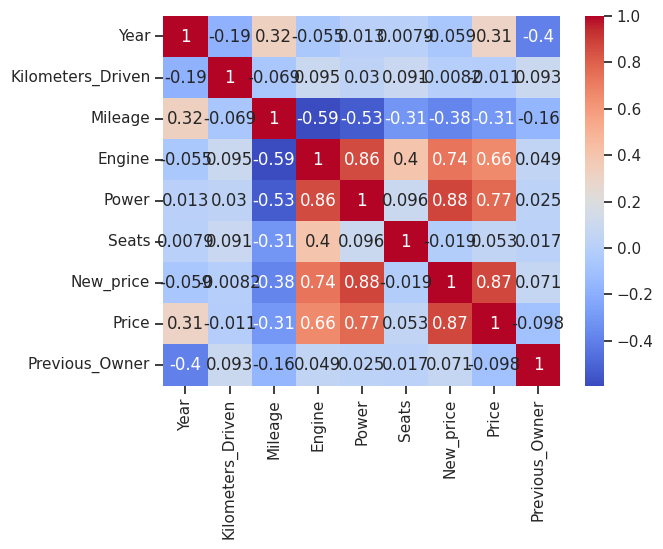

In [356]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

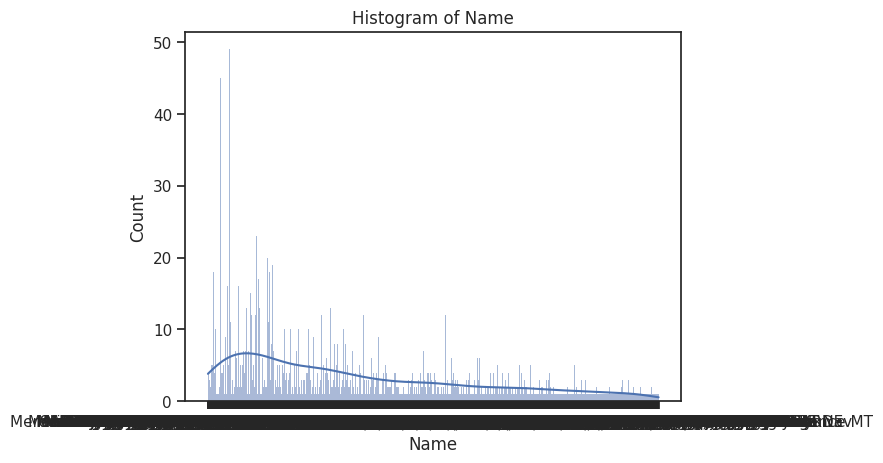

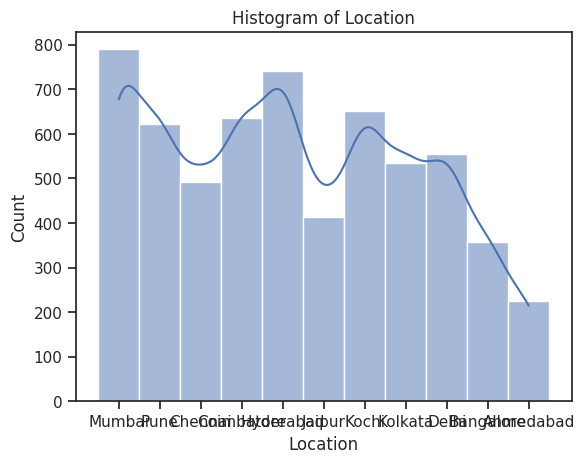

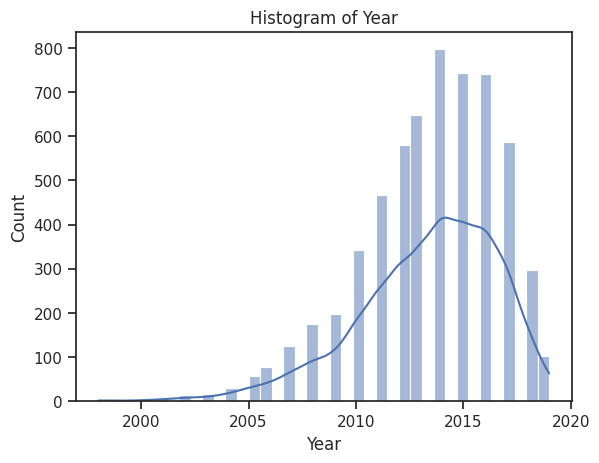

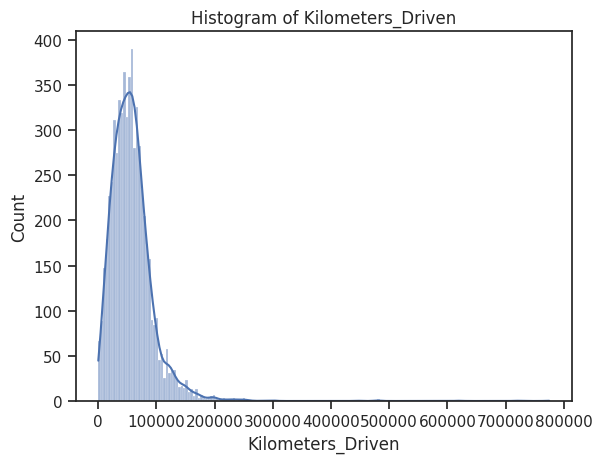

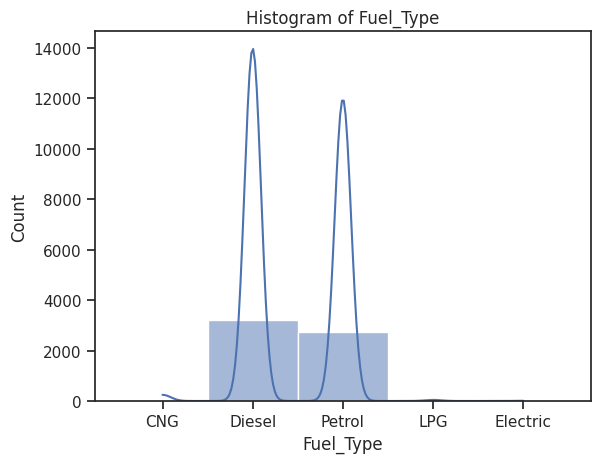

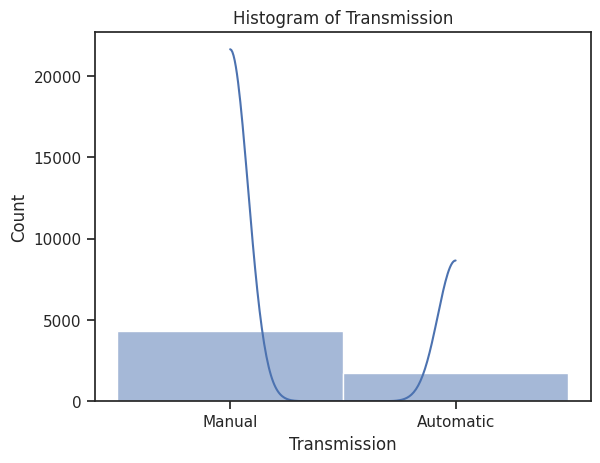

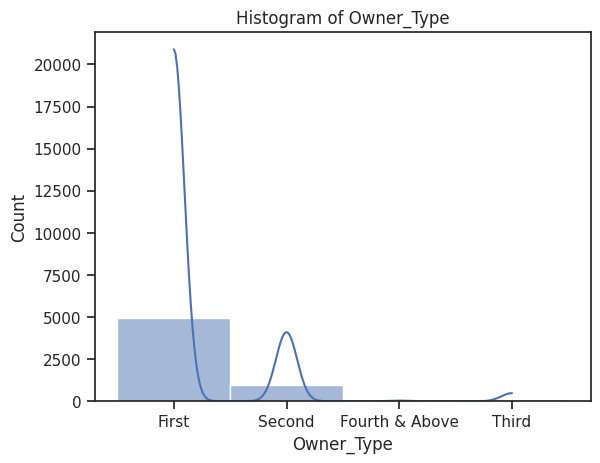

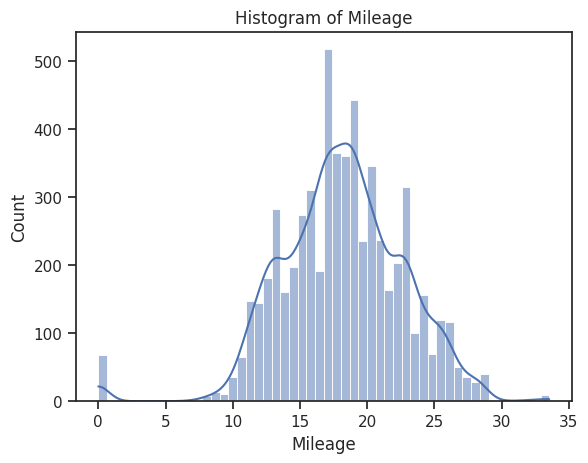

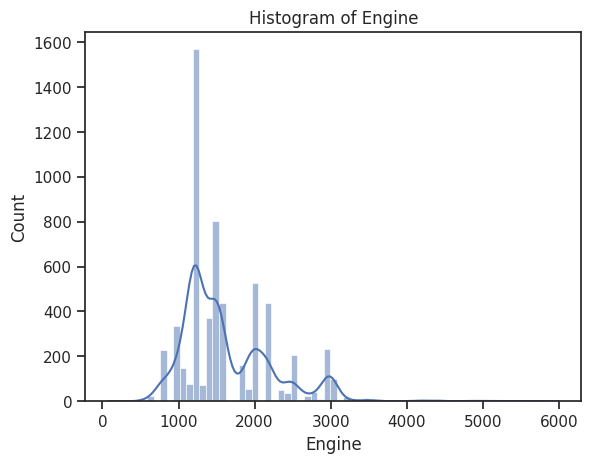

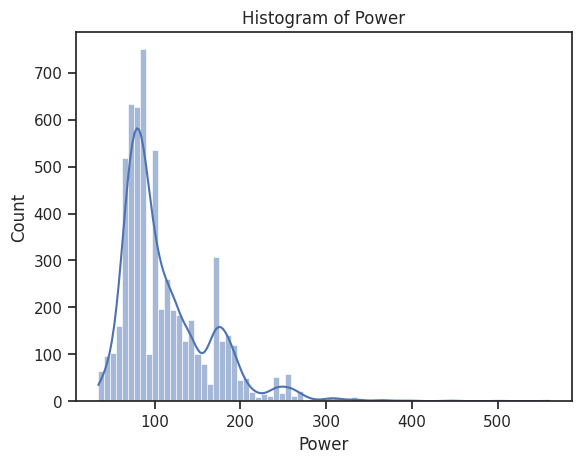

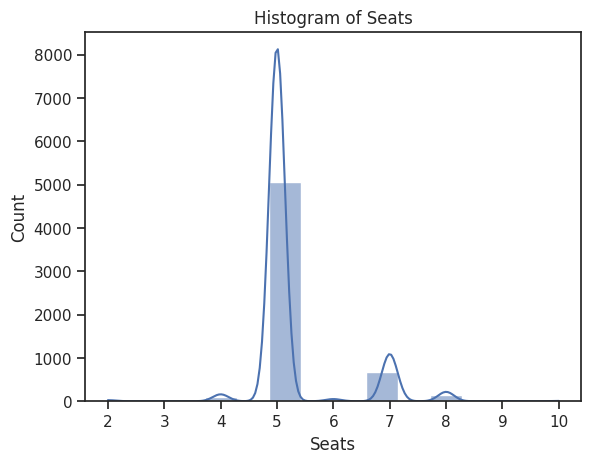

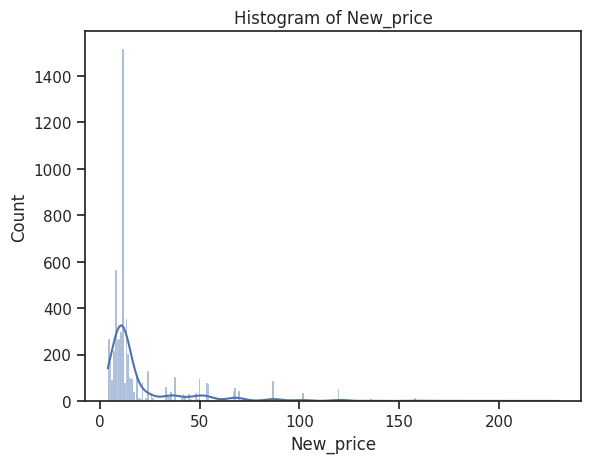

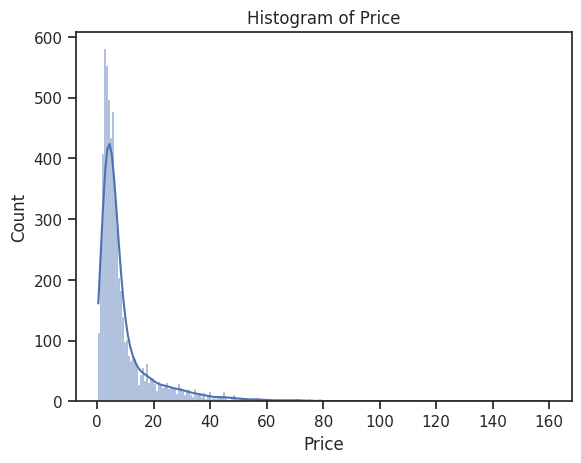

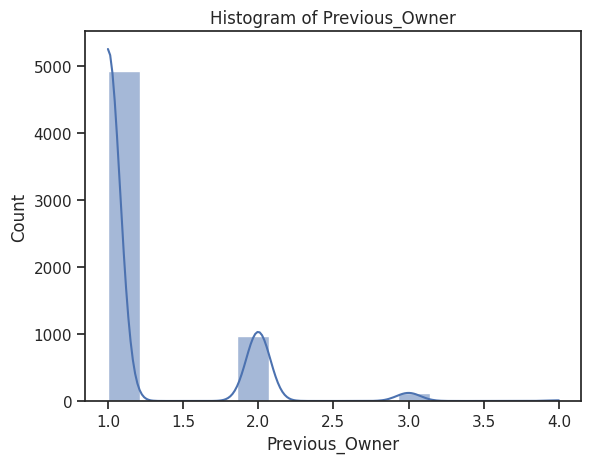

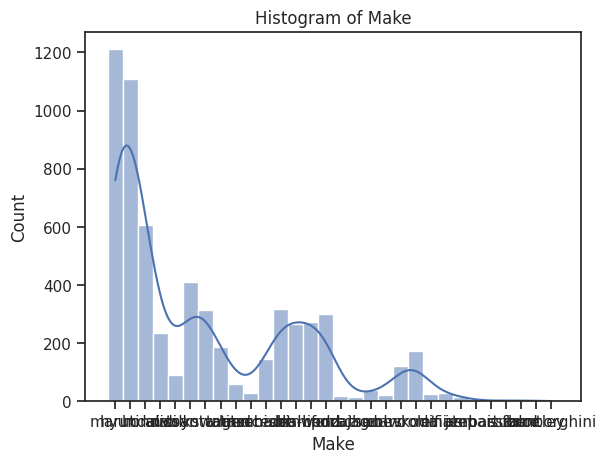

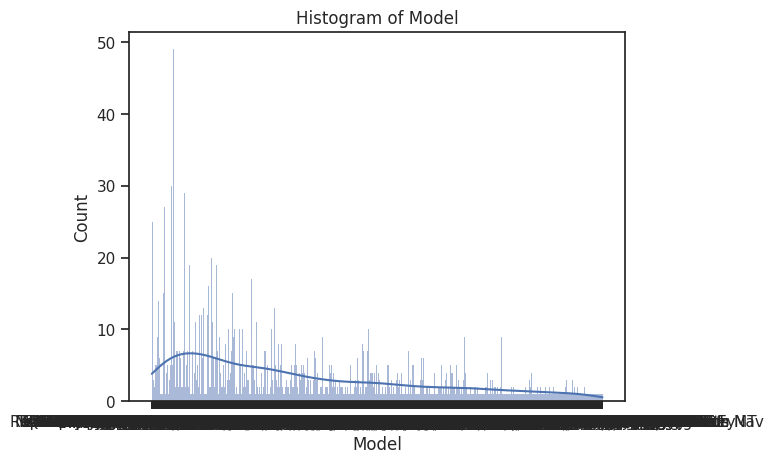

In [357]:
# Select the numerical columns from the DataFrame
all_cols = [i for i in dataset.columns]

# Plot histograms to visualize the distribution of numerical variables
for col in all_cols:
    plt.figure()
    sns.histplot(data=dataset, x=col, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

In [358]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):

    """ Boxplot and histogram combined

    feature: 1-d feature array

    figsize: size of fig (default (9, 8))

    bins: number of bins (default None / auto)

    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # Creating the 2 subplots

    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column

    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram

    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram

    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

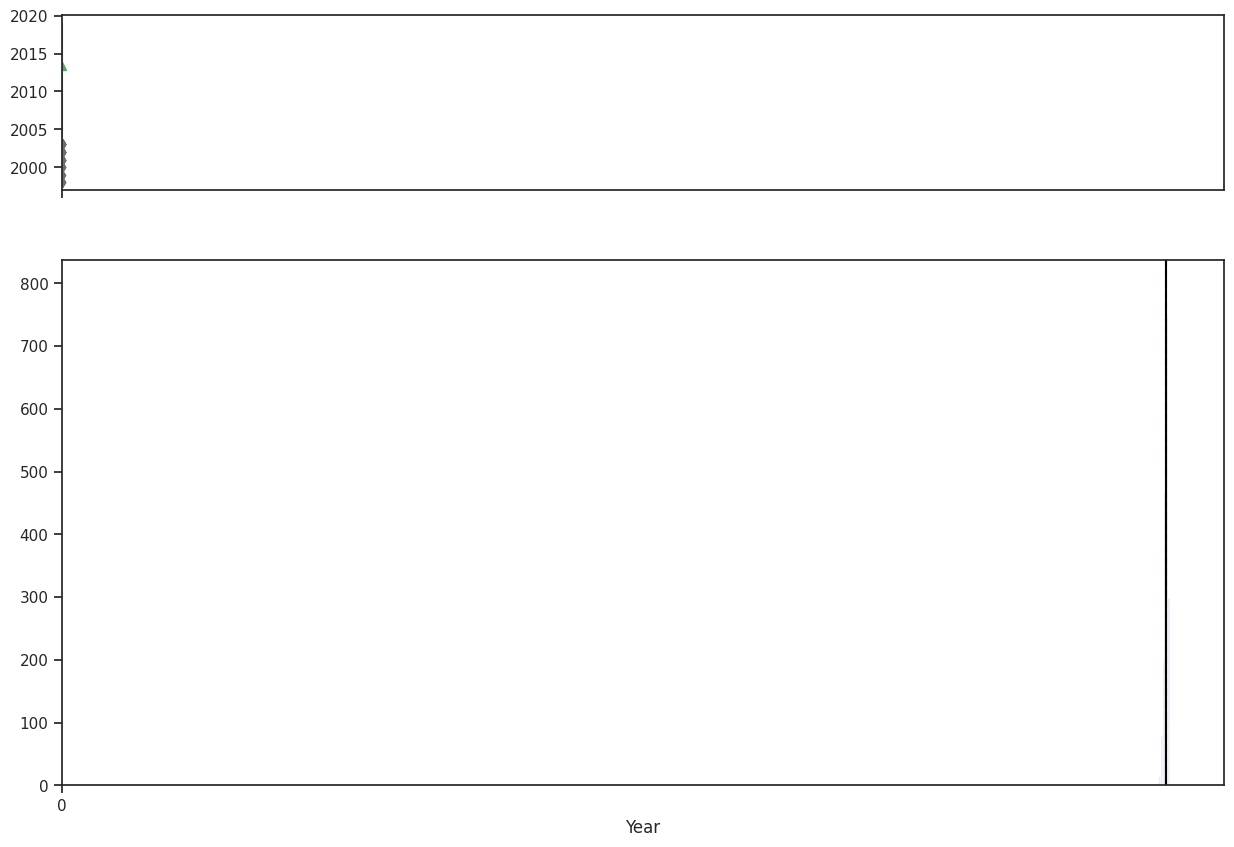

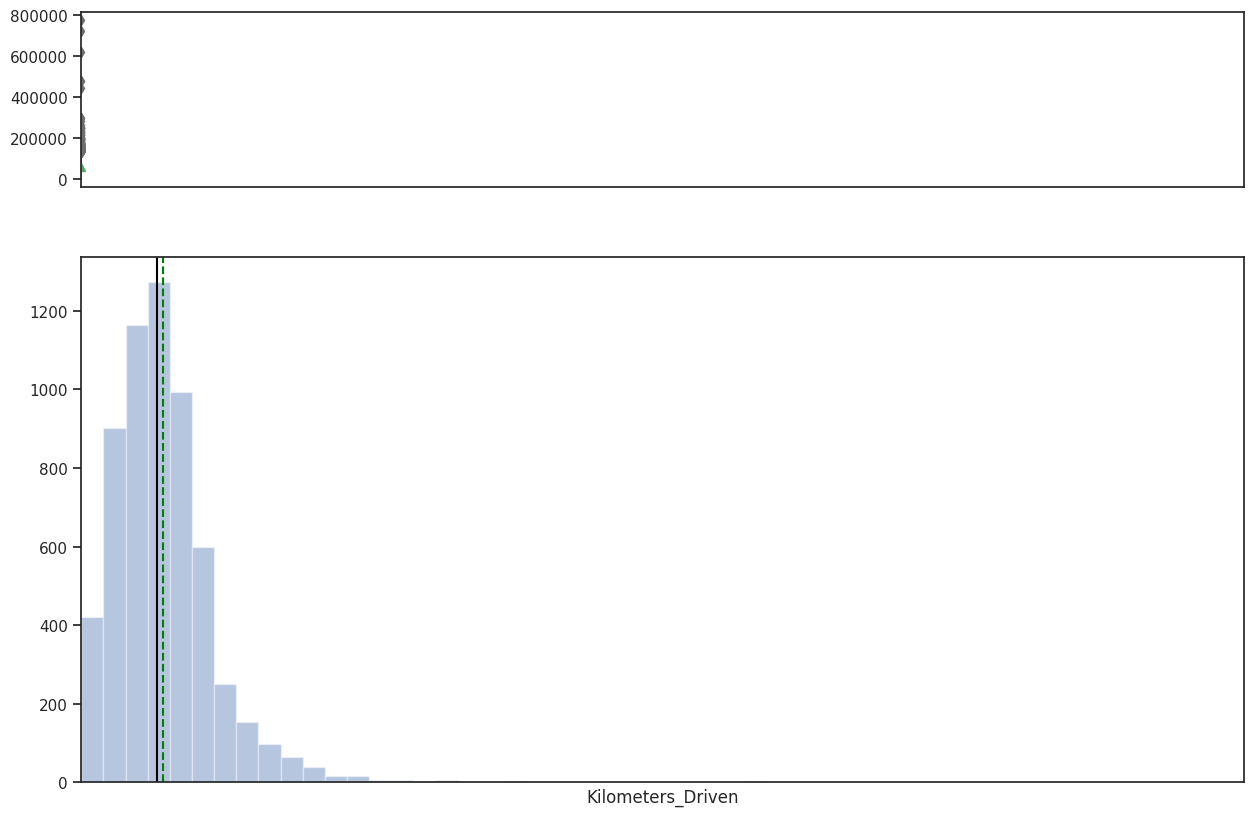

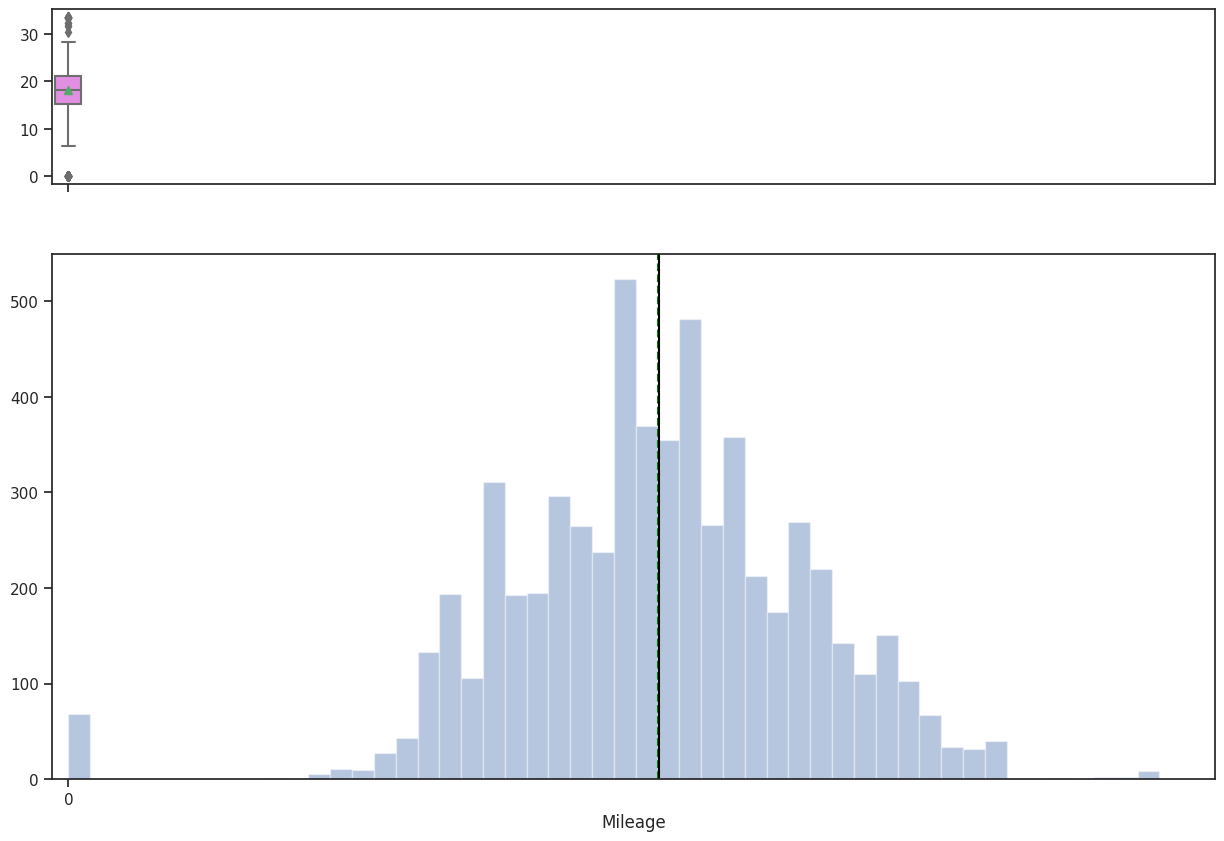

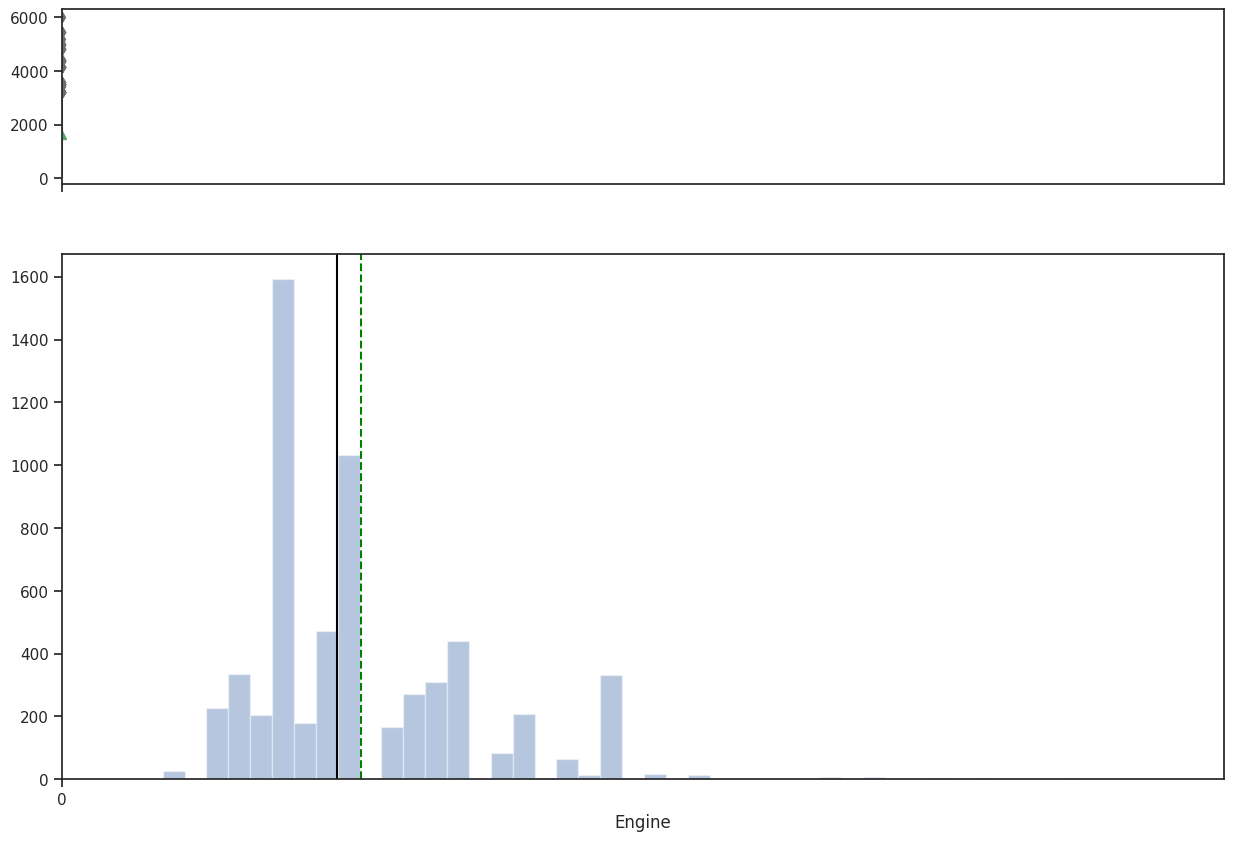

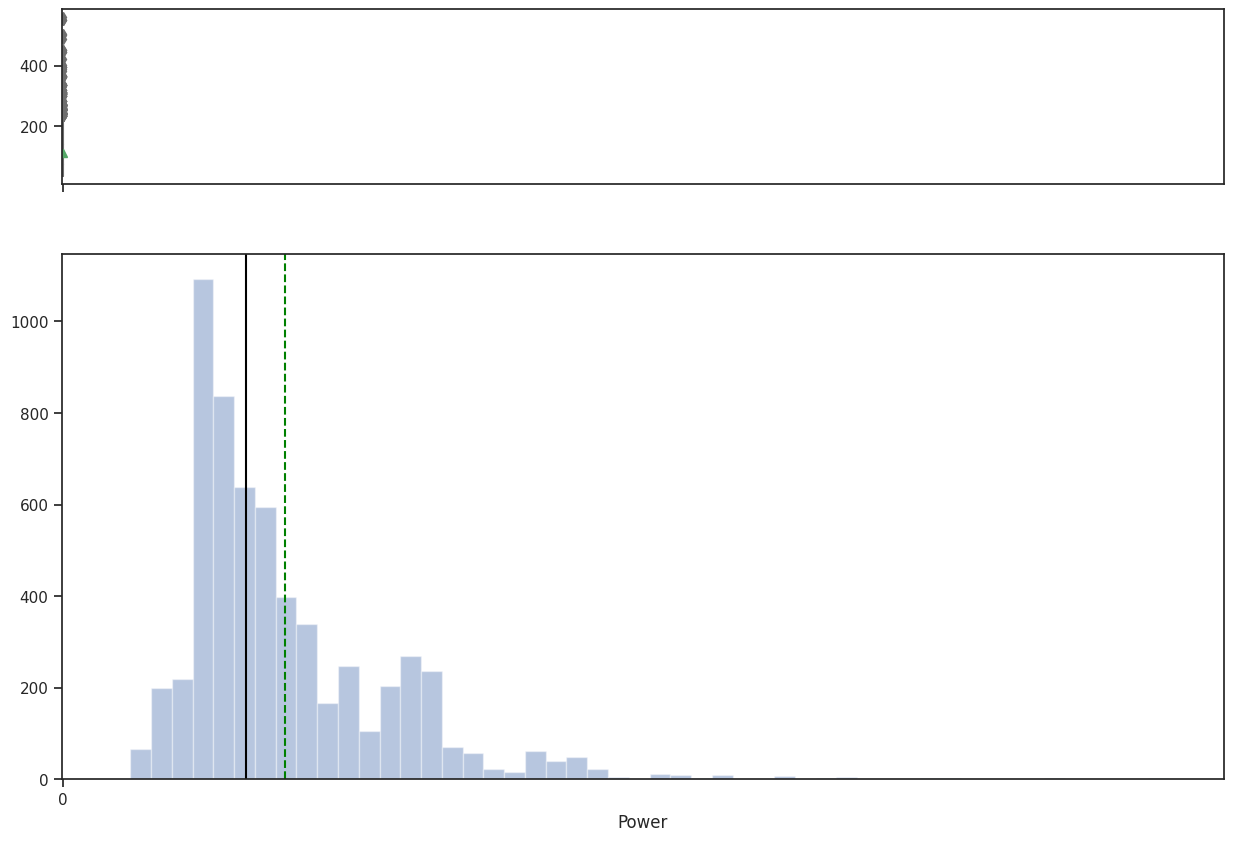

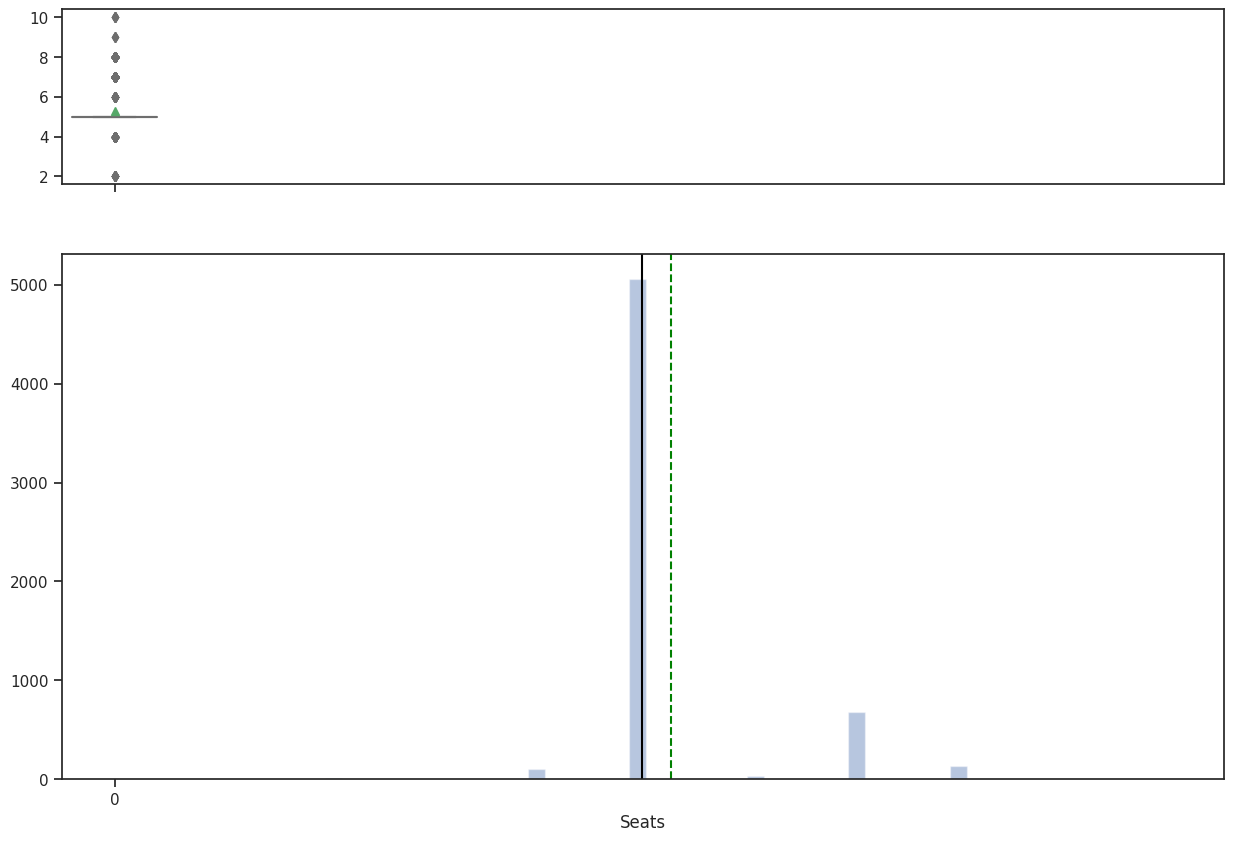

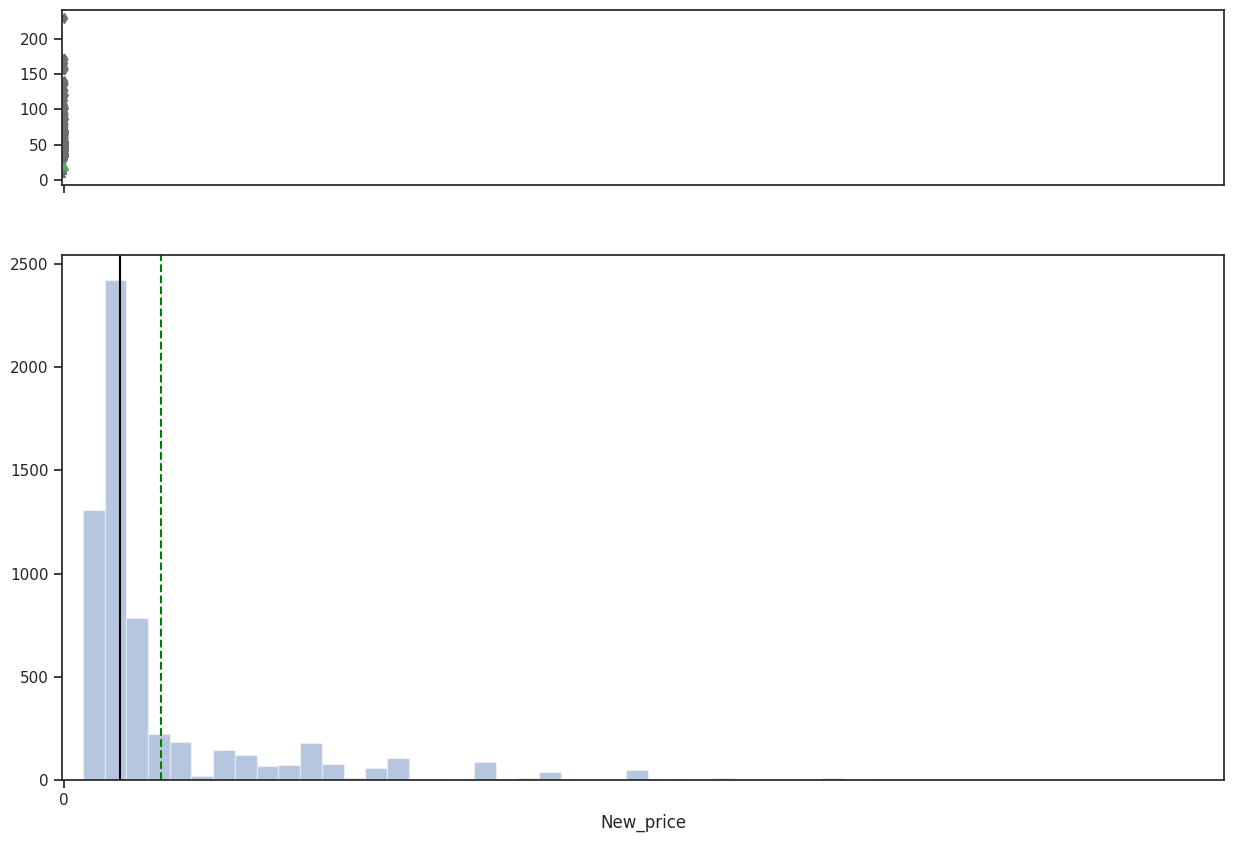

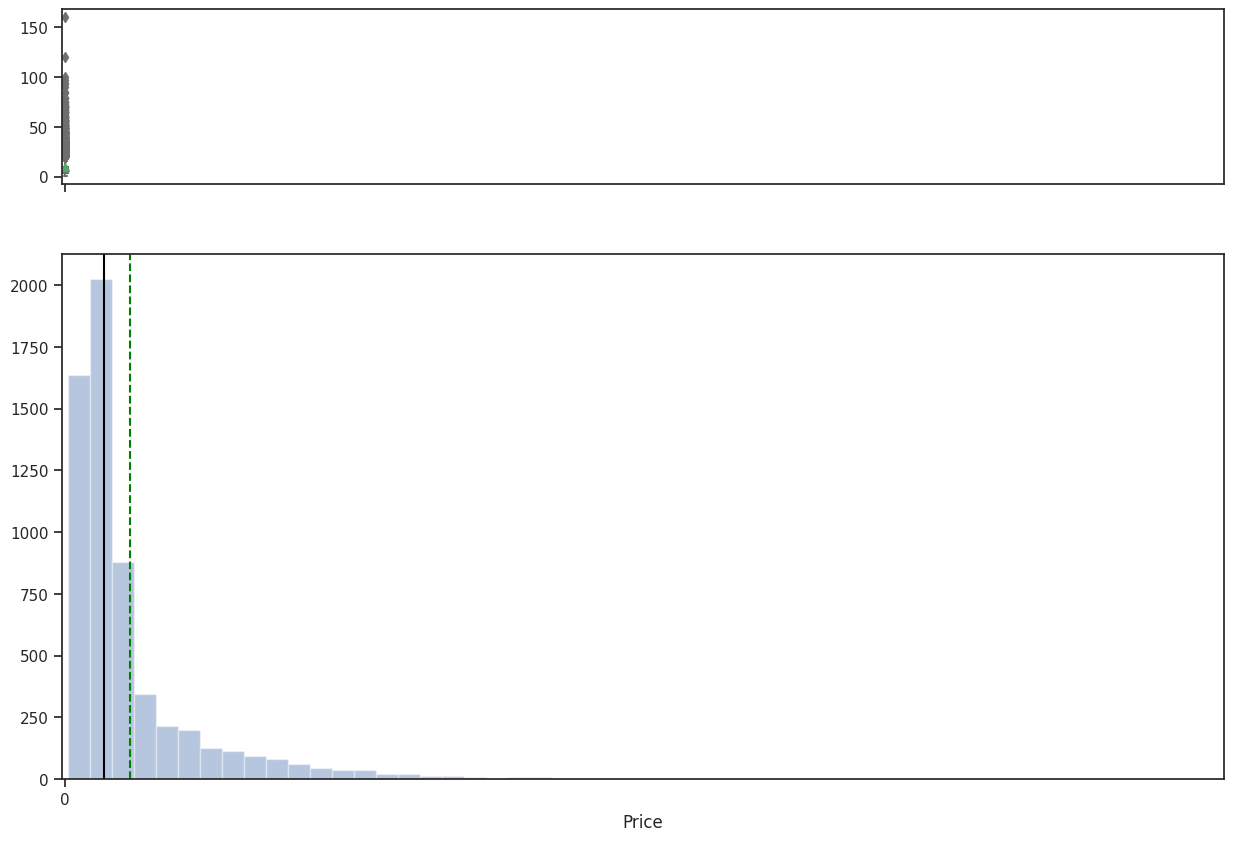

In [359]:
# Plot histogram and box-plot for 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price'
for col in numerical_cols:
  histogram_boxplot(dataset[col])

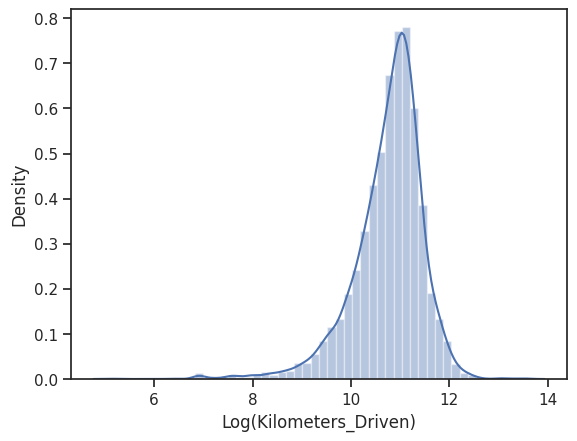

In [360]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(dataset["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

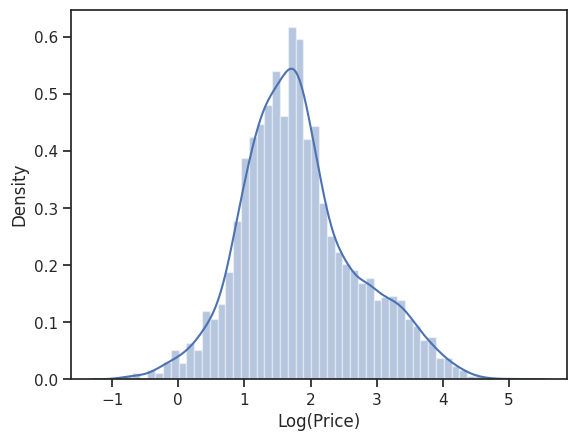

In [361]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(dataset["Price"]), axlabel = "Log(Price)");

<Axes: xlabel='Log(New_price)', ylabel='Density'>

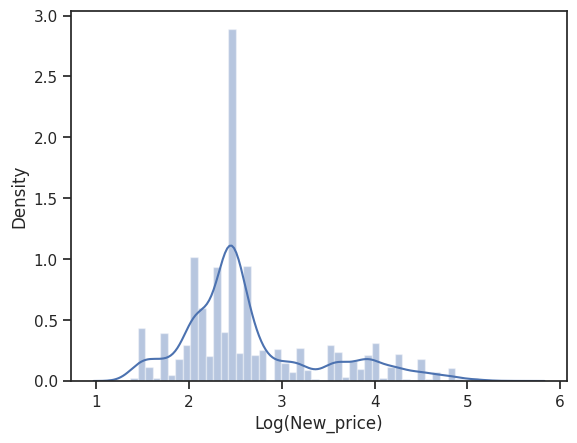

In [362]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(dataset["New_price"]), axlabel = "Log(New_price)")

- Kilometers_Driven is highly right-skewed while price is highly Left-skewed and I will use Log transformation of the feature to reduce/remove the skewness

In [363]:
# adding columns for log(Kilometers_Driven)
dataset["Kilometers_Driven_Log"] = np.log(dataset["Kilometers_Driven"])


In [364]:
# adding columns for log(Price)
dataset["Price_Log"] = np.log(dataset["Price"])

In [365]:
skewed_columns = dataset.select_dtypes(include=[np.number]).apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_columns = skewed_columns[abs(skewed_columns) > 0.5]  # Adjust the threshold as needed


In [366]:
skewed_columns

Kilometers_Driven        4.204752
Price                    3.337576
New_price                2.953131
Previous_Owner           2.276915
Power                    1.923099
Seats                    1.908709
Engine                   1.423811
Year                    -0.845668
Kilometers_Driven_Log   -1.357522
dtype: float64

**Skewed Columns Observations:**
- Kilometers_Driven: This column has a positive skewness of 4.204752, indicating that the distribution of the data is right-skewed. This means that there are more values concentrated less driven kilometers.
- Price: This column has a positive skewness of 3.337576, indicating a right-skewed distribution. It suggests that the majority of the car prices are concentrated towards Lower priced vehicles.
- New_price: This column also has a positive skewness of 2.953131, indicating a right-skewed distribution. Similar to the Price column, it suggests that most of the new car prices are concentrated towards the lower priced when new.
- Previous_Owner: This column has a positive skewness of 2.276915, indicating a right-skewed distribution. It suggests that most cars have a small number of previous owners, with a few cars having a relatively higher number of previous owners.
- Power: This column has a positive skewness of 1.923099, indicating a right-skewed distribution. It suggests that the majority of the car power values are concentrated towards the lower end for smaller engines sizes.
- Seats: This column has a positive skewness of 1.908709, indicating a right-skewed distribution. It suggests that most cars have a small number of seats, with a few cars having a relatively higher number of seats.
- Engine: This column has a positive skewness of 1.423811, indicating a right-skewed distribution. It suggests that the majority of the car engine sizes are concentrated towards the smaller sizes and reflect on Power the same.
- Year: This column has a negative skewness of -0.845668, indicating a left-skewed distribution. It suggests that the distribution of car years is slightly skewed towards more recent vehicles and less older vehicles.

In [367]:

def perc_on_bar(z):
    total = len(dataset[z])
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(data=dataset, x=z, palette='Paired', order=dataset[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), fontsize=12)

    plt.title(f"{z} plot")
    plt.show()

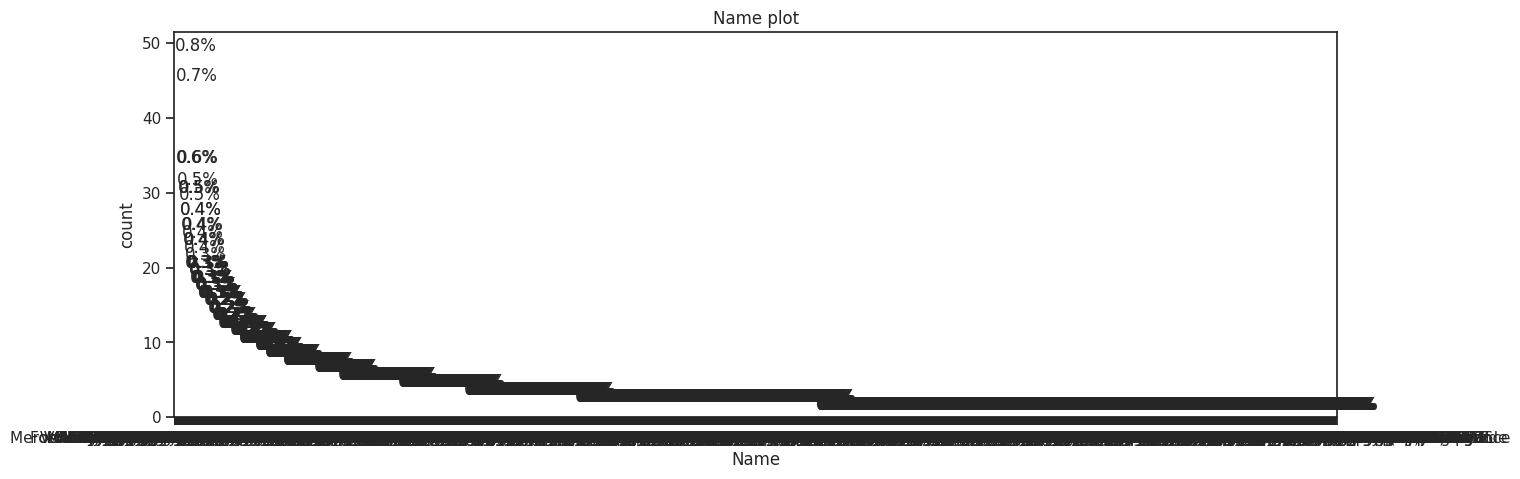

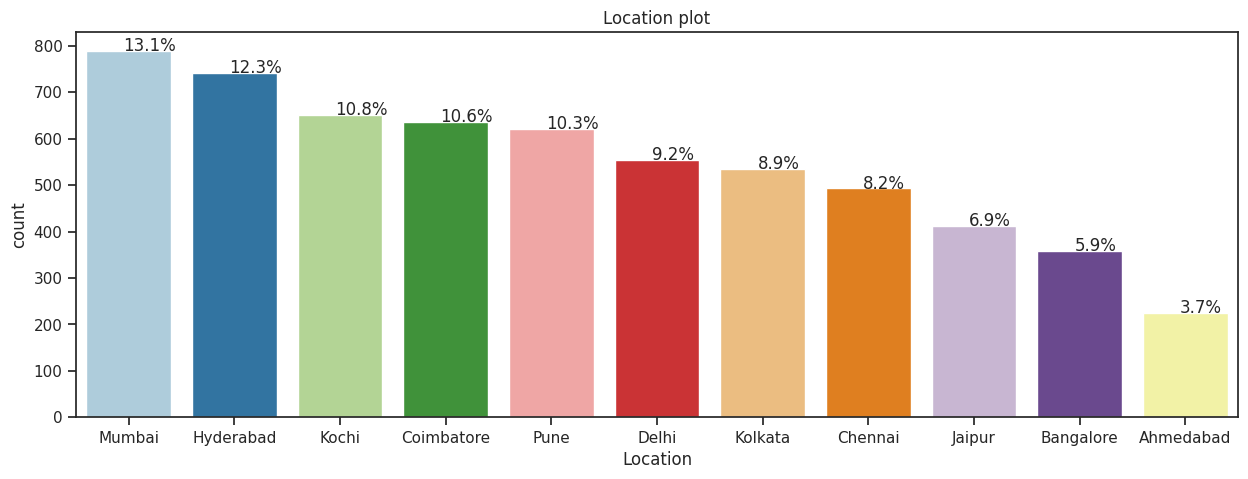

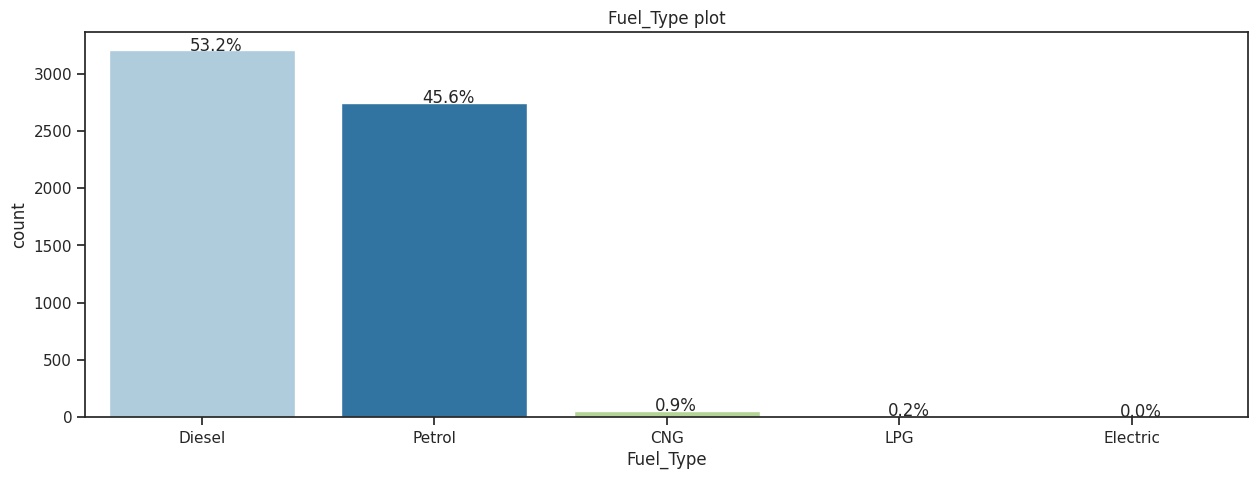

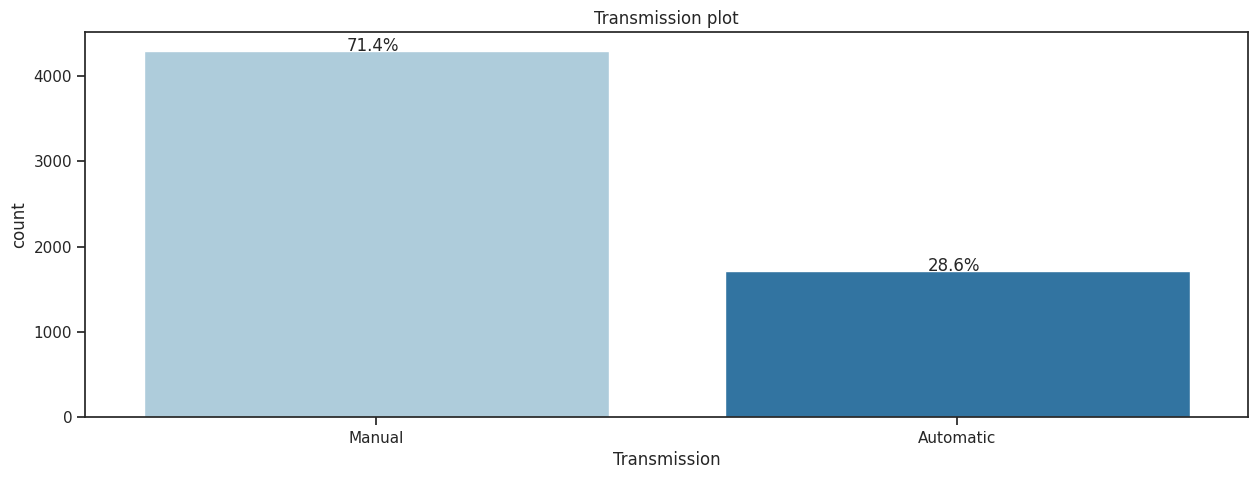

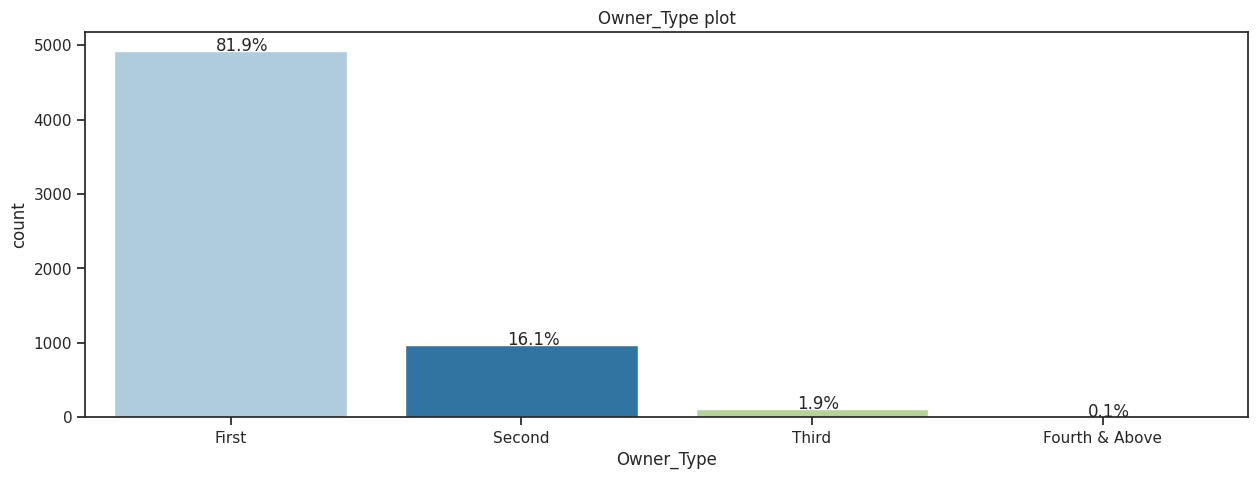

In [368]:
# Plot histogram and box-plot for categorical_cols = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
for col in categorical_cols:
  perc_on_bar(col)

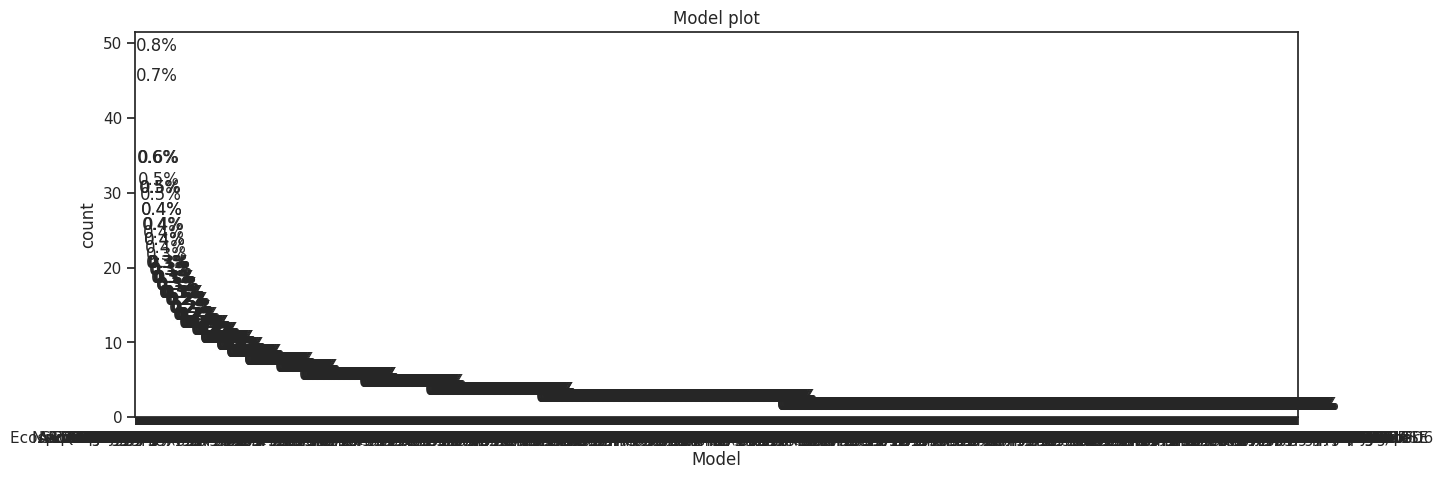

In [369]:
perc_on_bar("Model")

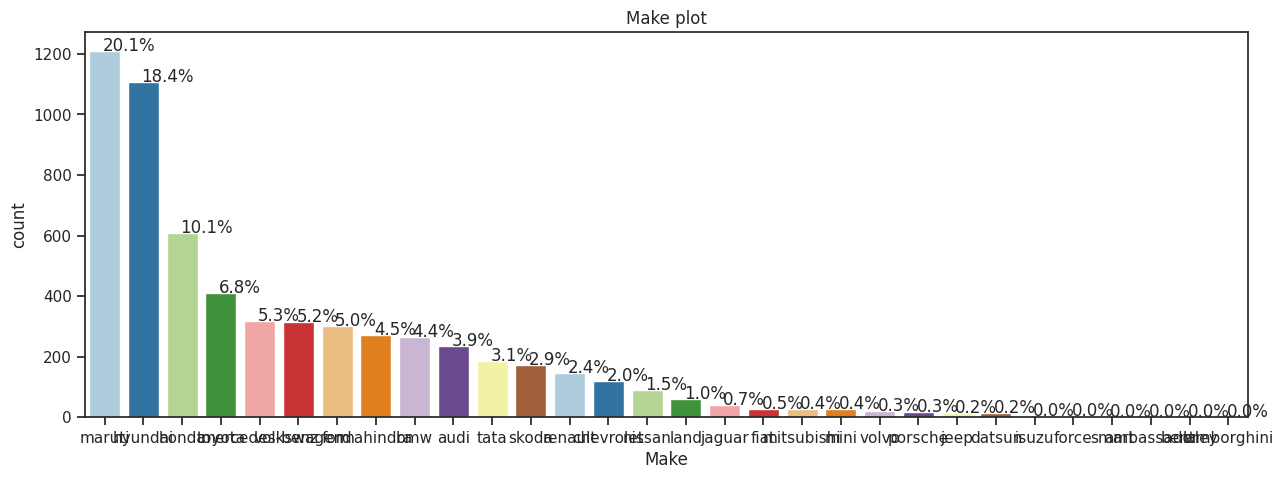

In [370]:
perc_on_bar("Make")

**Observations**:

- all the charts are skewed on one side
- diesell

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

**Observation**: Already split car name by model and make however the model has still too many unique values. Make is the car brand might have better correlation to price.

In [371]:
dataset["Make"].value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               266
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
ambassador          1
bentley             1
lamborghini         1
Name: Make, dtype: int64

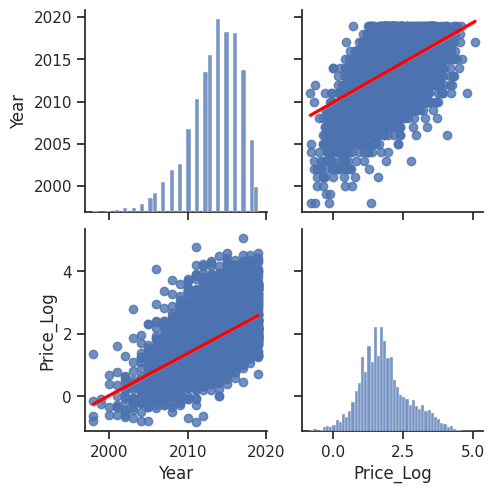

In [372]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset[['Year', 'Price_Log']], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

- It seems that newer the car the higher the price can be expected.

<Figure size 1000x600 with 0 Axes>

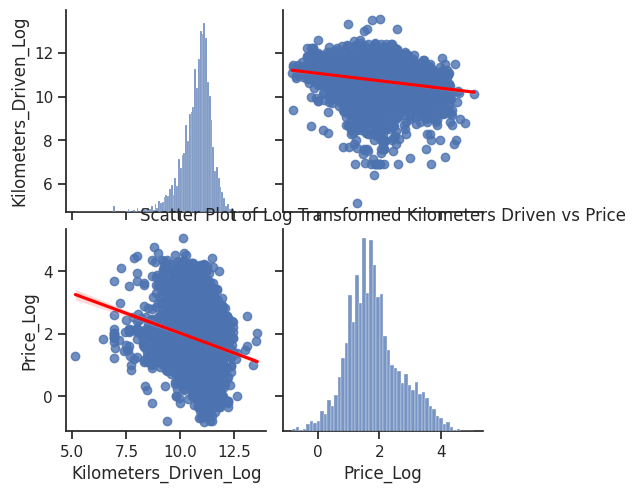

In [373]:
plt.figure(figsize=(10, 6))
sns.pairplot(dataset[['Kilometers_Driven_Log', 'Price_Log']], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.title('Scatter Plot of Log Transformed Kilometers Driven vs Price')
plt.show()


higher the kilometers driven by car and it negatively influences the price base on this charts.

In [374]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5))
    plt.title(f'box plot for {z}')
    sns.boxplot(x=z, y='Price', data=dataset)
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.title(f'box plot for {z} without outliers')
    sns.boxplot(x=z, y='Price', data=dataset, showfliers=False)
    plt.show()

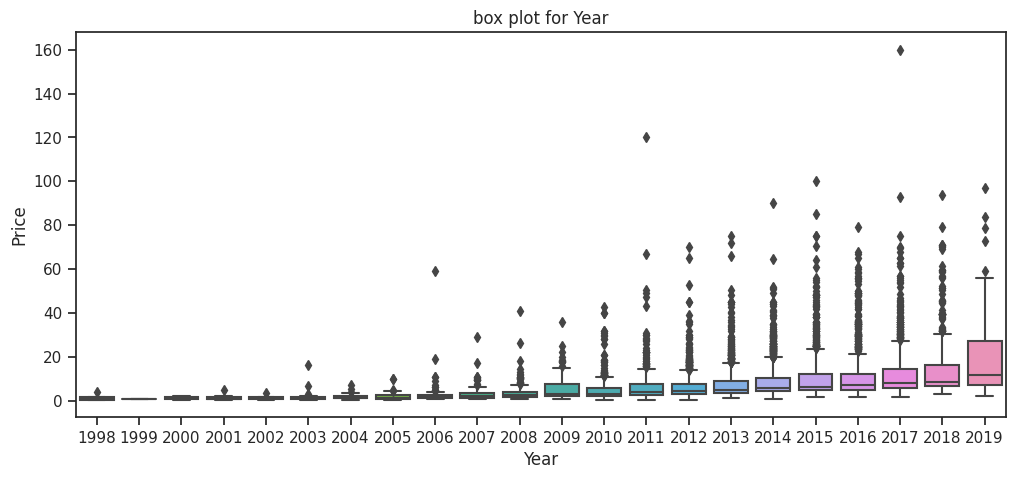

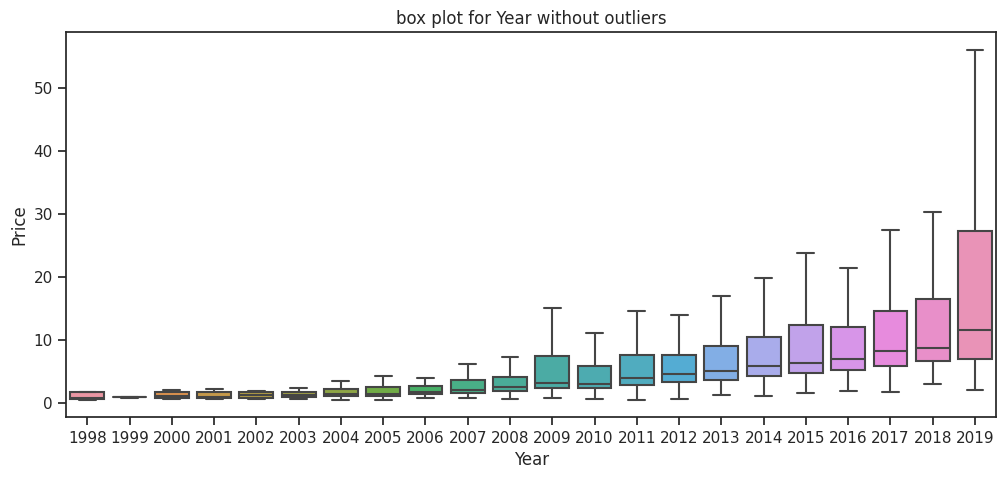

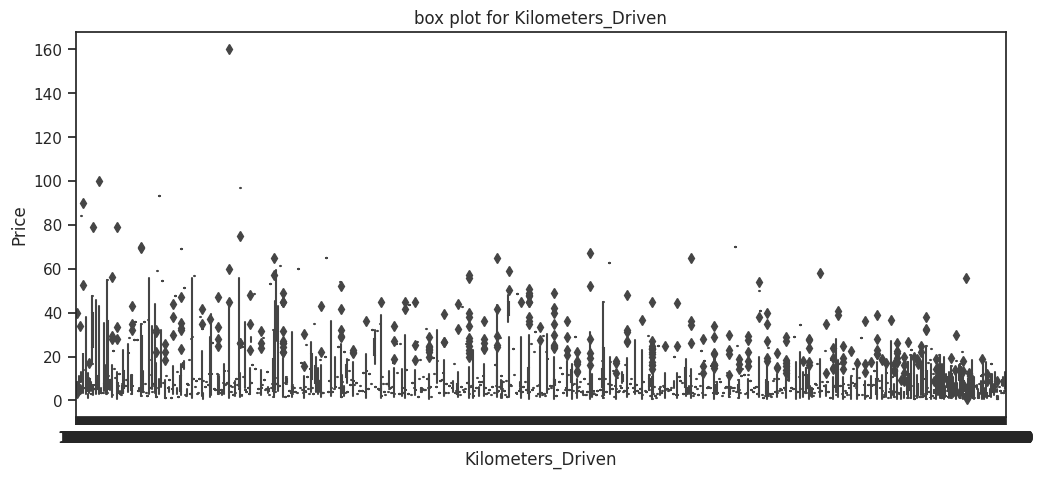

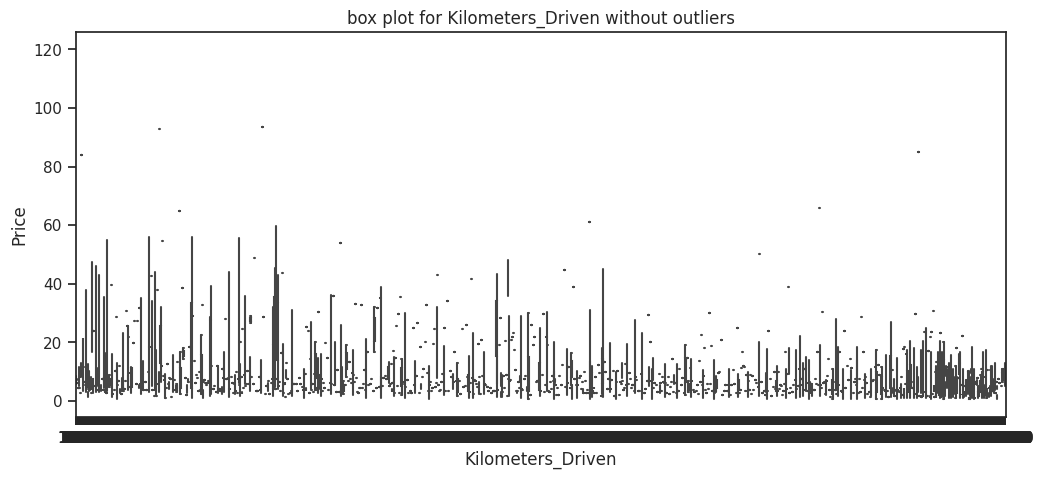

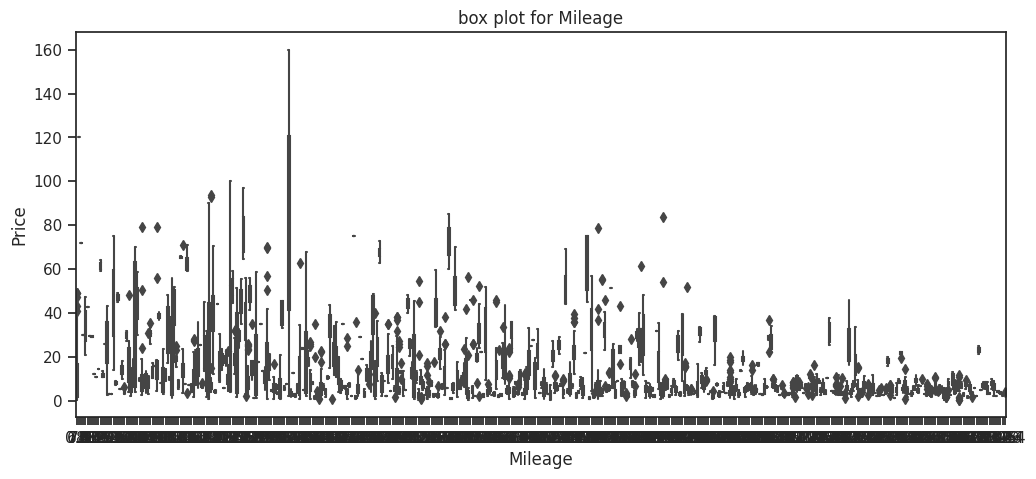

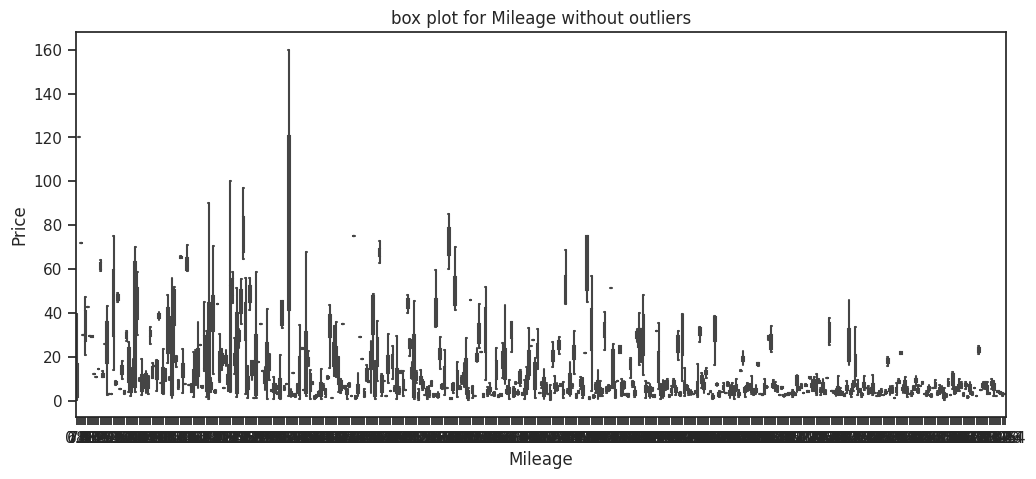

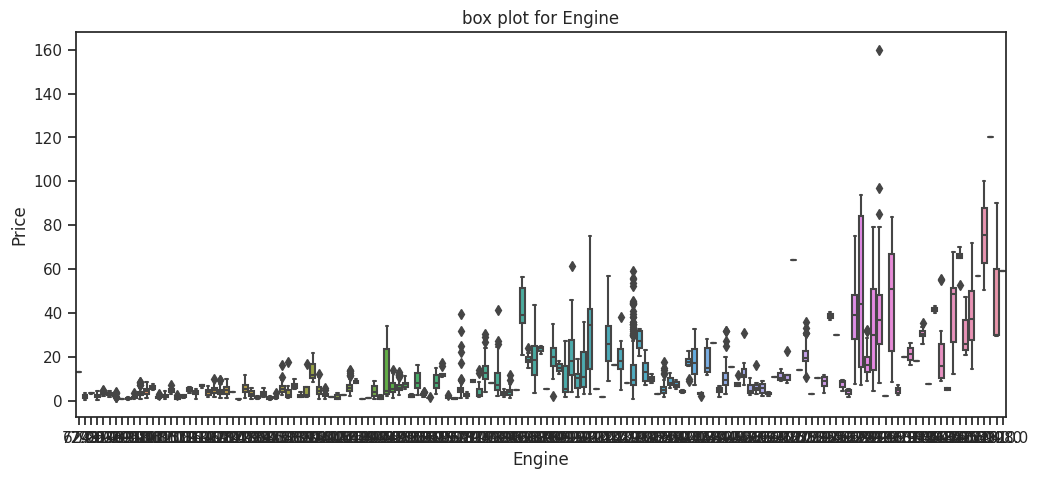

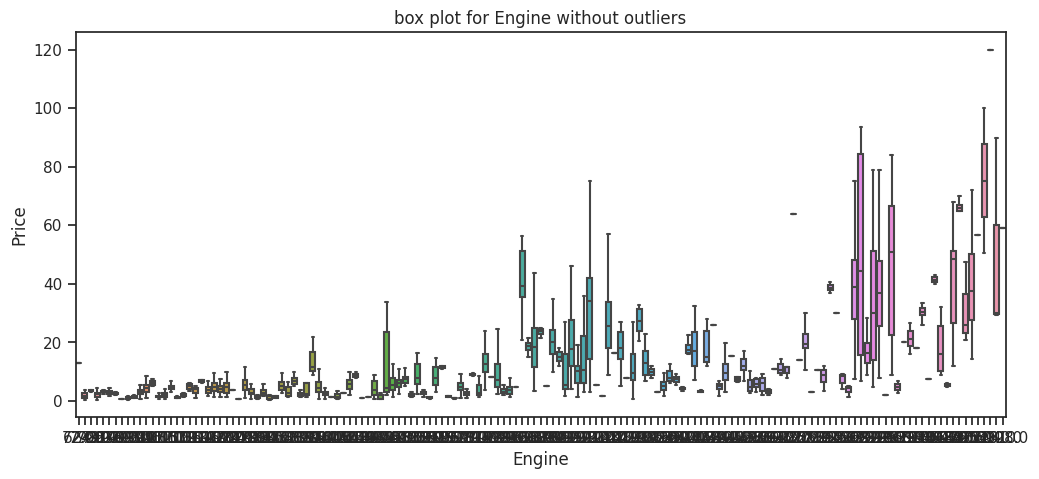

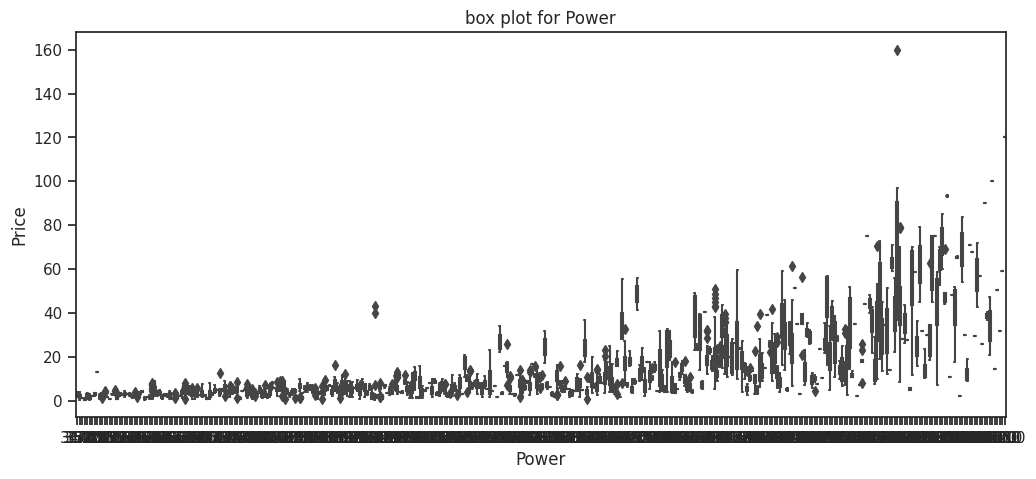

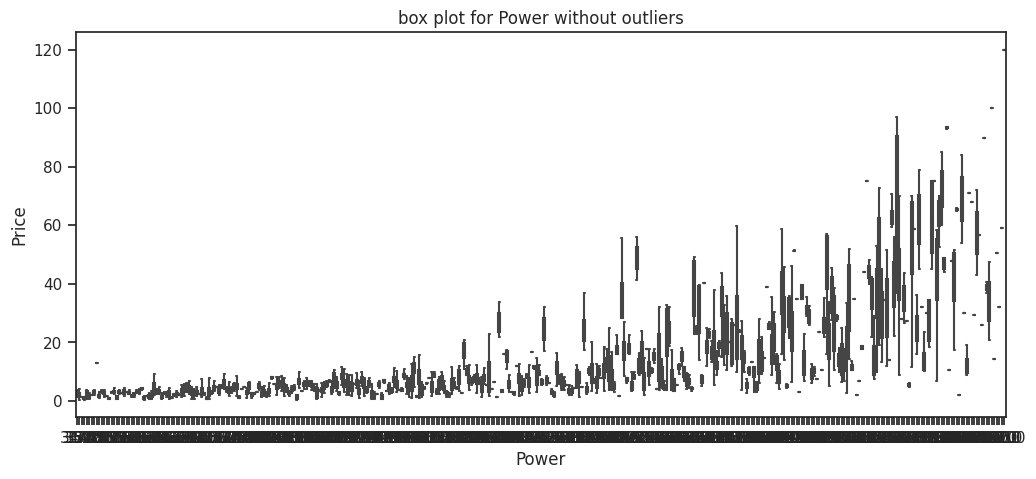

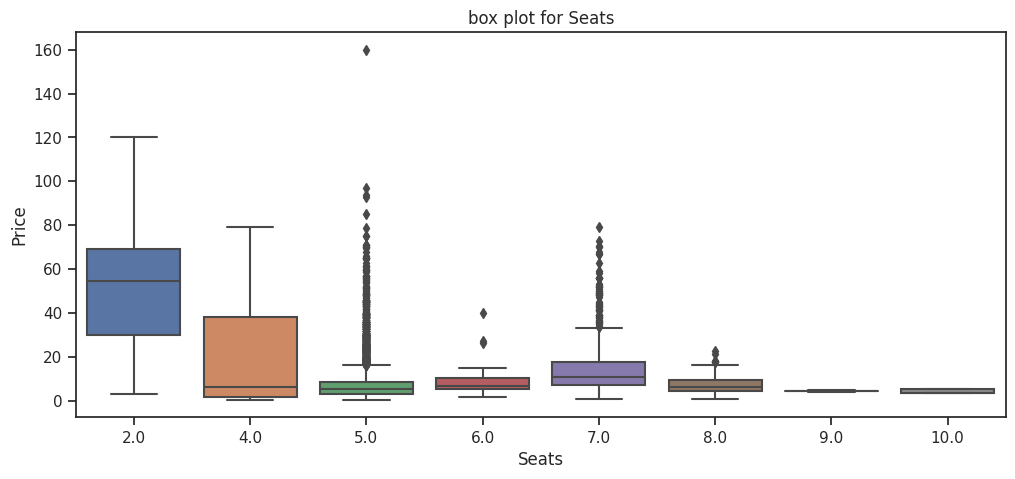

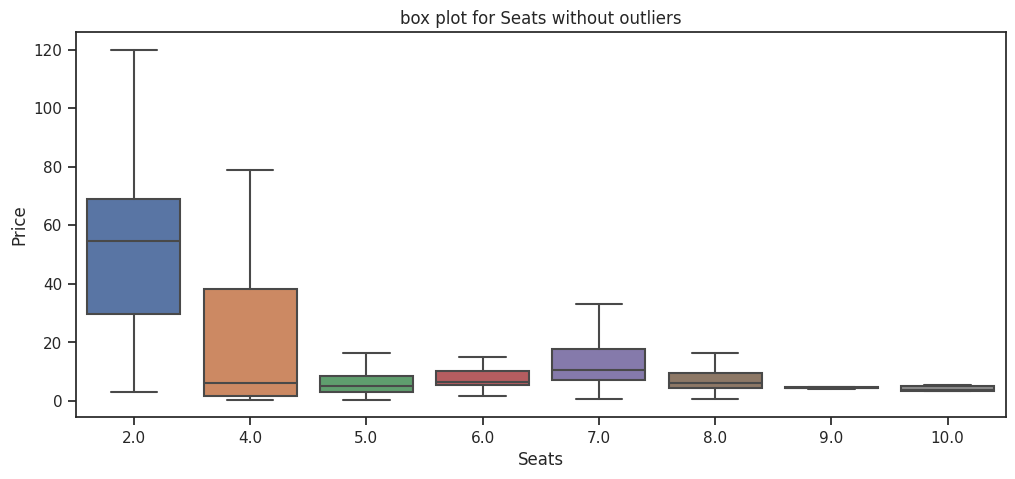

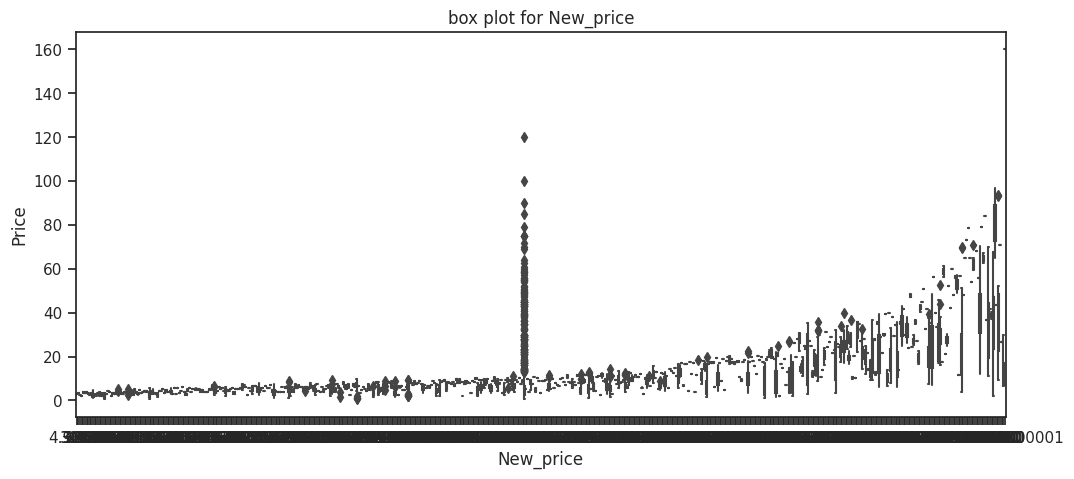

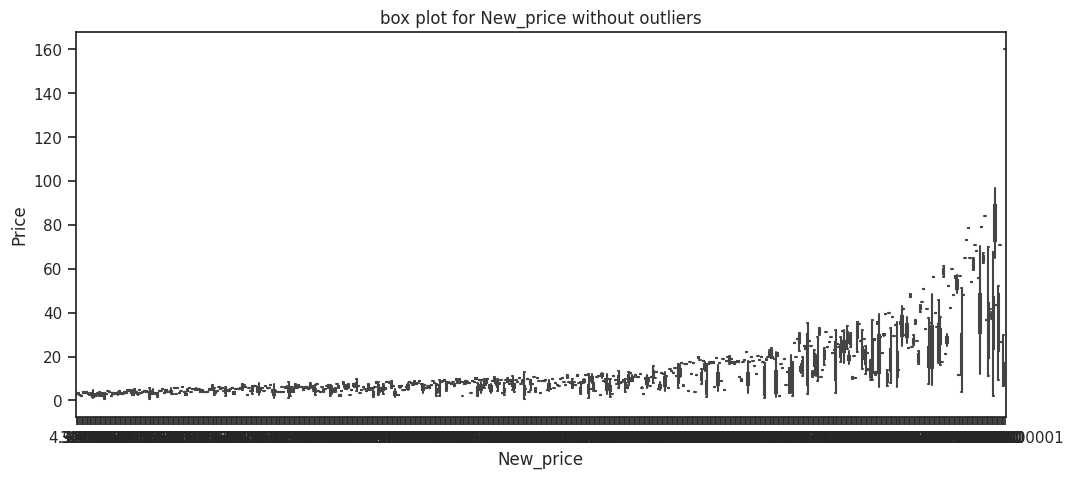

In [375]:
# Plot histogram and box-plot for 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price'
for col in numerical_cols[:-1]:
  boxplot(col)

the median distribution seems to around 20 range. Also note hyderabad, jaipur, Delhi and Ahmedabad might seem to have some outliers.

### **Missing value treatment**

In [376]:
dataset.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
Previous_Owner           0
Make                     0
Model                    0
Kilometers_Driven_Log    0
Price_Log                0
dtype: int64

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'Price_Log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','Price_Log','Kilometers_Driven' from X before splitting?

- 'Name': The 'Name' column contains categorical data that is not directly useful for regression modeling. Also there I am unable to see direct relationship to price yet and it would cause confusion therefore it safer to remove it. Also removing Model that was add which is also categorical data will help.
- Price' and 'Price_Log': Since our goal is to predict the car price ('Price'), using it as an input feature would be considered cheating. Since price_log is derived from price it would be affected the same way.
- Kilometers_Driven: Dropping this column helps avoid potential bias or misleading correlations between kilometers driven and price.
- Removed owner_type replacing it with previous_owner instead to fit a better representation with numbers

In [377]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [378]:
X = dataset.drop(['Name','Price','Price_Log','Kilometers_Driven', 'Model','Owner_Type'], axis = 1)

y = dataset[["Price_Log", "Price"]]

In [379]:
X = pd.get_dummies(X, drop_first = True)

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


print(X_train.shape, X_test.shape)

(4212, 52) (1806, 52)


In [381]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)

    pred_train_ = np.exp(pred_train)

    pred_test = model.predict(X_test)

    pred_test_ = np.exp(pred_test)

    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)

    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)

    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)

    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:

        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))

        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))

        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))

        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))

    # Returning the list with train and test scores
    return score_list

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Linear Regression**

In [382]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [383]:
# Create a linear regression model
lr = LinearRegression()

In [384]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_Log'])

LinearRegression()

In [385]:
y_train.describe()

,Price_Log,Price
count,4212.000000,4212.00000
mean,1.815175,9.38650
std,0.871181,11.17385
min,-0.820981,0.44000
25%,1.252763,3.50000
50%,1.713798,5.55000
75%,2.274956,9.72750
max,4.787492,120.00000


In [386]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8546484254623847
R-square on test set :  0.8650532631396288
RMSE on training set :  4.259524676243827
RMSE on test set :  4.094120595205215


- The R-squared values of approximately 0.85 on the training set and 0.86 on the test set indicate that the model explains a good amount of variance in the target variable.
- The RMSE values of around 4.26 on the training set and 4.11 on the test set indicate the average prediction error of the model, with lower values indicating better performance.

Building a model using statsmodels.

In [387]:
# Import Statsmodels
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):

    # Create the model
    olsmodel = sm.OLS(y_train["Price_Log"], train)

    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     981.4
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        05:03:09   Log-Likelihood:                 49.835
No. Observations:                4212   AIC:                             6.330
Df Residuals:                    4159   BIC:                             342.7
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -239.02

- The "R-squared" value is 0.923, indicating that the model explains approximately 92.3% of the variance in the target variable.
- The "Adj. R-squared" value is 0.922, which is the adjusted R-squared that takes into account the number of predictors in the model.
- The "F-statistic" is 943.3, with a corresponding p-value of 0.00. This suggests that the overall model is statistically significant.

In [388]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [389]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Make_chevrolet,-0.479549,4.875155e-02
Location_Delhi,-0.049501,2.767685e-02
Make_land,0.616160,1.266784e-02
Make_datsun,-0.652464,1.067235e-02
Location_Jaipur,-0.061221,9.805880e-03
Make_tata,-0.690153,4.479977e-03
Make_mini,0.871322,4.807139e-04
Fuel_Type_Electric,1.078118,1.101503e-05
Location_Coimbatore,0.107356,1.248801e-06
Location_Hyderabad,0.113651,1.391226e-07


In [390]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()


# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in dataset.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)


start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Make', 'Location', 'Fuel_Type', 'Seats', 'Previous_Owner', 'Engine', 'Mileage', 'Transmission', 'Kilometers_Driven', 'Kilometers_Driven_Log', 'Power', 'Year']


**Observation on Linear Regression:**


- Previous_Owner and Owner_type are the same but since the number representation give better prediction as logically if you have a higher number owner then the price should drop which is reflected by negative coeff.
- Mileage and Kilometers_Driven_Log has a negative influence on price which suggests that higher the those value the lower the price.
- Location does have an impact based on location the value of the car can drop or raise for example delhi is -0.054296 coeff lowering the price and hyderabad has 0.106518 coeff which have increasing the price.
- Year, Engine, Power, Seats have a increasing influence on price
- FuelType based on  fuel diesel and electric has positive influence and other fuel type have a negative influence on price.
- Manual Transmission has lower price value and Automatic has a positive price value.

### Ridge / Lasso Regression

In [391]:
from sklearn.linear_model import Ridge, Lasso


In [392]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)

In [393]:
# Fit the model to your data
ridge_model.fit(X_train, y_train['Price_Log'])

Ridge()

In [394]:
ridge_model_score = get_model_score(model=ridge_model)

R-sqaure on training set :  0.8504255652768727
R-square on test set :  0.8644994254297116
RMSE on training set :  4.32095708812358
RMSE on test set :  4.102513375526891


These scores indicate that the Ridge regression model performs well on both the training and test sets, with high R-squared values and relatively low RMSE values.

### Decision Trees

In [395]:
from sklearn.tree import DecisionTreeRegressor

In [396]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state=1)

In [397]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_Log'])

DecisionTreeRegressor(random_state=1)

In [398]:
dtree_model_score = get_model_score(model=dtree)

R-sqaure on training set :  0.9999965696959587
R-square on test set :  0.8386499452776528
RMSE on training set :  0.020692719736775493
RMSE on test set :  4.476761890542359


The high R-squared value on the training set indicates that the Decision Tree model is able to fit the training data almost perfectly. However, there is a notable difference in the R-squared value on the test set, which suggests that the model may be overfitting the training data.

In [399]:
# Feature importance
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                  6.176091e-01
Year                   2.314286e-01
New_price              6.850795e-02
Kilometers_Driven_Log  1.760700e-02
Engine                 1.395349e-02
Mileage                8.893556e-03
Make_tata              3.996829e-03
Location_Kolkata       3.758850e-03
Location_Hyderabad     3.259762e-03
Make_porsche           2.814952e-03
Location_Coimbatore    2.739620e-03
Previous_Owner         2.565847e-03
Fuel_Type_Diesel       1.832765e-03
Location_Bangalore     1.673532e-03
Location_Pune          1.653913e-03
Make_nissan            1.631652e-03
Seats                  1.630427e-03
Make_chevrolet         1.526292e-03
Make_toyota            1.424122e-03
Location_Delhi         1.148552e-03
Location_Mumbai        1.023188e-03
Transmission_Manual    9.660602e-04
Location_Chennai       9.239671e-04
Location_Jaipur        8.734273e-04
Make_mahindra          8.285500e-04
Location_Kochi         7.614914e-04
Fuel_Type_Petrol       7.070

The features with higher importance values contribute more to the decision-making process in the tree building. In this case, "Power" has the highest importance, followed by "Year" and "New_price". Conversely, features with very low or zero importance values have little to no impact on the tree's decisions.

### Random Forest

In [400]:
from sklearn.ensemble import RandomForestRegressor


In [401]:
# Create the Random Forest regression model
rf_model = RandomForestRegressor(random_state=1)

In [402]:
# Fit Randomforest regression model
rf_model.fit(X_train, y_train['Price_Log'])

RandomForestRegressor(random_state=1)

In [403]:
rf_model_score = get_model_score(model=rf_model)

R-sqaure on training set :  0.9766916809090921
R-square on test set :  0.8896283262042187
RMSE on training set :  1.7057160880562026
RMSE on test set :  3.7026124033263375


- Overall, these results indicate that the Random Forest regression model is performing well, with a high R-squared score and relatively low RMSE values on both the training and test sets.
- The model explains around 97.67% of the variance in the training set and around 88.96% of the variance in the test set


In [404]:
# Print important features similar to decision trees
print(pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.611514
Year                   0.234598
New_price              0.061776
Engine                 0.019597
Kilometers_Driven_Log  0.015539
Mileage                0.010035
Location_Kolkata       0.004656
Make_tata              0.003762
Seats                  0.003383
Location_Hyderabad     0.002984
Previous_Owner         0.002401
Location_Coimbatore    0.002125
Make_honda             0.002064
Make_audi              0.001902
Location_Bangalore     0.001453
Location_Mumbai        0.001377
Make_skoda             0.001347
Location_Delhi         0.001312
Make_nissan            0.001197
Location_Pune          0.001165
Fuel_Type_Diesel       0.001144
Location_Jaipur        0.001114
Location_Kochi         0.001074
Make_chevrolet         0.001035
Make_porsche           0.001013
Fuel_Type_Petrol       0.000998
Transmission_Manual    0.000983
Make_hyundai           0.000955
Make_toyota            0.000945
Make_mercedes-benz     0.000883
Location

In this case, "Power" has the highest importance, followed by "Year" and "New_price" just like the decision tree.

**Observations:**

- Linear Regression and Ridge/Lasso Regression have similar performance with high R-squared scores and relatively low RMSE values. This indicates that these models can explain a good portion of the variance in the target variable and make reasonably accurate predictions.
- Decision Trees show an exceptionally high R-squared score on the training set, suggesting overfitting as the model achieves near-perfect performance on the training data but performs worse on the test set. The RMSE on the test set is also relatively high compared to the other models.
- Random Forest performs well on both the training and test sets, with a high R-squared score and relatively low RMSE. This indicates that Random Forest successfully captures the relationships in the data and generalizes well to unseen data.

Overall, Random Forest appears to indicate tha it is best-performing model among the four based on the provided evaluation metrics. It balances the trade-off between model complexity and generalization, leading to good predictive performance.

### **Hyperparameter Tuning: Decision Tree**

In [405]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV


In [406]:
# Choose the type of estimator
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Splitting criterion options
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train['Price_Log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['Price_Log'])

DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      min_samples_leaf=4, random_state=1)

In [407]:
# Get score of the dtree_tuned
dtree_tuned_score = get_model_score(model=dtree_tuned)

R-sqaure on training set :  0.9488190221941365
R-square on test set :  0.8675976454229276
RMSE on training set :  2.5275837674119965
RMSE on test set :  4.055340188153515


**Feature Importance**

In [408]:
# Print important features similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.637964
Year                   0.237368
New_price              0.069657
Engine                 0.014339
Kilometers_Driven_Log  0.007341
Mileage                0.006571
Make_tata              0.003417
Location_Kolkata       0.003015
Location_Hyderabad     0.002895
Location_Coimbatore    0.001750
Fuel_Type_Petrol       0.001710
Make_nissan            0.001591
Make_chevrolet         0.001160
Previous_Owner         0.001133
Fuel_Type_Diesel       0.001094
Location_Bangalore     0.000909
Make_toyota            0.000904
Seats                  0.000871
Location_Delhi         0.000710
Make_mahindra          0.000671
Transmission_Manual    0.000666
Make_porsche           0.000595
Make_land              0.000526
Make_maruti            0.000441
Make_mini              0.000374
Location_Chennai       0.000355
Location_Kochi         0.000354
Location_Mumbai        0.000344
Location_Pune          0.000322
Location_Jaipur        0.000204
Make_aud

**Observations:**
- Although the original decision tree model had extremely high R-squared on the training set (almost 1) and lower RMSE on the test set, it may indicate overfitting. The tuned decision tree model, on the other hand, has a relatively lower R-squared on the training set and slightly higher RMSE on the test set. This suggests that the tuned model might have better generalization ability and may perform more consistently on unseen data.
- the feature importance does not seem to have change from power, year and new_price

### **Hyperparameter Tuning: Random Forest**

In [409]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create the Random Forest regressor
rf_model = RandomForestRegressor(random_state=1)

# Perform randomized search
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=3, random_state=1)
random_search.fit(X_train, y_train['Price_Log'])

# Get the best estimator and its score
rf_tuned = random_search.best_estimator_
rf_tuned_score = get_model_score(model=rf_tuned)

R-sqaure on training set :  0.9637937209773848
R-square on test set :  0.8840964476194775
RMSE on training set :  2.125901876048631
RMSE on test set :  3.7942663200446884


**Feature Importance**

In [410]:
# Print important features similar to decision trees
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                  6.153177e-01
Year                   2.366990e-01
New_price              6.499861e-02
Engine                 2.013015e-02
Kilometers_Driven_Log  1.363267e-02
Mileage                9.951556e-03
Location_Kolkata       4.343248e-03
Make_tata              3.591067e-03
Seats                  2.728025e-03
Location_Hyderabad     2.657759e-03
Make_audi              2.072145e-03
Previous_Owner         1.963549e-03
Location_Coimbatore    1.859886e-03
Make_honda             1.593304e-03
Transmission_Manual    1.355276e-03
Location_Delhi         1.160052e-03
Location_Mumbai        1.133826e-03
Make_skoda             1.107527e-03
Location_Bangalore     1.068565e-03
Make_nissan            1.022375e-03
Make_chevrolet         9.390062e-04
Fuel_Type_Diesel       9.364479e-04
Fuel_Type_Petrol       9.303057e-04
Make_mercedes-benz     8.652579e-04
Location_Jaipur        8.433049e-04
Location_Pune          8.290624e-04
Make_toyota            8.145

This feature importance is similar to the initial Random Forest model (rf_model), indicating that the importance of features remains consistent between the two models. The top important features, such as "Power," "Year," and "New_price," have higher weights, suggesting they have a strong impact on predicting the target variable.

Overall, the tuned Random Forest model (rf_tuned) may have slightly lower performance metrics compared to the initial model (rf_model), but it still performs well and captures important features in a similar manner.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [411]:
# Define the models and their names
models = [lr, ridge_model, dtree, rf_model, dtree_tuned, rf_tuned]
model_names = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'Tuned Decision Tree', 'Tuned Random Forest']

# Define the columns for the DataFrame
columns = ['Model', 'Train_r2', 'Test_r2', 'Train_RMSE', 'Test_RMSE']

# Initialize an empty list to store the data
data = []

# Loop through the models and their names to retrieve the scores
for model, model_name in zip(models, model_names):
    # Fit the model
    model.fit(X_train, y_train['Price_Log'])

    # Calculate the scores
    scores = get_model_score(model, False)

    # Append the scores to the data list
    data.append([model_name, scores[0], scores[1], scores[2], scores[3]])

# Create the DataFrame
comparison_frame = pd.DataFrame(data, columns=columns)

comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.854648,0.865053,4.259525,4.094121
1,Ridge Regression,0.850426,0.864499,4.320957,4.102513
2,Decision Tree,0.999997,0.838650,0.020693,4.476762
3,Random Forest,0.976692,0.889628,1.705716,3.702612
4,Tuned Decision Tree,0.948819,0.867598,2.527584,4.055340
5,Tuned Random Forest,0.963794,0.884096,2.125902,3.794266


In [412]:
comparison_frame.round(2)

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.85,0.87,4.26,4.09
1,Ridge Regression,0.85,0.86,4.32,4.10
2,Decision Tree,1.00,0.84,0.02,4.48
3,Random Forest,0.98,0.89,1.71,3.70
4,Tuned Decision Tree,0.95,0.87,2.53,4.06
5,Tuned Random Forest,0.96,0.88,2.13,3.79


Following were the final scores
Linear Regression:
- R-squared on the training set: 0.8504
- R-squared on the test set: 0.8645

Ridge Regression:
- R-squared on the training set: 0.8504
- R-squared on the test set: 0.8645

Decision Trees:
- R-squared on the training set: 0.9999
- R-squared on the test set: 0.8386

Random Forest:
- R-squared on the training set: 0.9767
- R-squared on the test set: 0.8896

Tuned Decision Trees:
- R-squared on training set: 0.9488
- R-squared on test set: 0.8676

Tuned Random Forest:
- R-squared on training set: 0.9638
- R-squared on test set: 0.8841

Based on the scores I found that following:
- Random Forest performs relatively better among the chosen techniques, with the highest R-squared value on the test set.
- Decision Trees have the highest R-squared value on the training set but lower performance on the test set, indicating overfitting.
- Linear Regression and Ridge Regression have similar R-squared values on both the training and test sets, indicating consistent performance. However, their R-squared values are lower compared to the Decision Trees and Random Forest techniques.

for the scope of improvement
- The performance of the techniques can potentially be further improved by fine-tuning the hyperparameters using techniques like GridSearchCV or RandomizedSearchCV. I tried to do that with the Random Forest and Decision Trees which improved the performance however it takes longer to generate the fit with random forest consuming more processing.
- Feature engineering and selection techniques can be applied to enhance the input features and remove any irrelevant or redundant features. for example Incorporate domain knowledge to engineer new features that are likely to have a significant impact on the car price. For example, you can create a feature that represents the age of the car based on the 'Year' feature. Handling Missing Data by either collecting more efficently on going or get the data from 3rd party for the missing information from a database provided by domain expert like car manufacters or other credible sources.
- You can combine the different models and get a meta model that will generate more accurate results.
- You can also gradient boosting to improve the models starting the decision tree which was marked as the weakest.

**2. Refined insights:**
1- What are the most meaningful insights relevant to the problem?

1. Features Importance: Both decision tree and random forest models' analyses of feature importance offer insightful information about the elements that have a substantial impact on used car prices. The three most crucial components in both models are "Power," "Year," and "New_price." Indicating that newer cars with higher power and a higher starting cost tend to have higher prices in the used car market, these qualities have a significant impact on the expected price of a car.

2. Engine and Mileage: A car's engine size ("Engine") and fuel economy ("Mileage") affect the pricing of the vehicle. Because these characteristics are frequently linked to stronger performance and better fuel efficiency, cars with larger engines and better mileage typically cost more.

3. Location: The car's location ("Location") is a significant determinant of price. Prices in several places, including Kolkata, Hyderabad, Coimbatore, and Bangalore, are generally greater than in other places. This shows that market dynamics and regional considerations may have a big influence on used automobile pricing.

4. Make (Brand): A car's make affects how much it costs. It has been discovered that some brands, like Tata, Honda, Audi, Skoda, and Hyundai, significantly affect the estimated price. This emphasises how important brand reputation, perceived quality, and consumer brand preferences are in influencing used car prices.

5. Model Performance: In terms of capturing the variation in the target variable and generalising well to new data, the Random Forest regression model fared better than other methods. In comparison to decision trees, ridge regression, and linear regression, it obtained a higher R-squared value on the test set. This suggests that the Random Forest model performs better in this dataset's used car price prediction.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

I suggest using the Random Forest model as the ultimate resolution based on the investigation and modeling fit and score.

Here are the reasons why Random Forest is the best solution:

1. On both the training and test sets, the Random Forest model exhibits the highest R-squared values, demonstrating its capacity to capture the variation in the target variable. It successfully strikes a decent balance between bias and variance, producing a trustworthy and solid model.

2. The Random Forest model performs consistently on both the training and test sets, demonstrating its capacity to generalise well to previously unexplored data. Overfitting, which is shown in the Decision Trees model, is prevented.

3. Features that are most important for predicting the target variable can be found using Random Forest's feature importance measures. This can offer insightful information on the elements that have the greatest influence on car prices.

4. Without the need for considerable feature engineering, Random Forest can handle both numerical and categorical features. Additionally, it can effectively manage missing data and outliers, minimising the need for labor-intensive data preprocessing.

5. Compared to individual decision trees, ensemble learning: Random Forest's combination of several decision trees reduces variance and boosts accuracy. To provide more precise forecasts, it uses the combined knowledge of several trees.


Given these elements, Random Forest appears as the most appropriate and trustworthy model in this situation for forecasting automobile prices. It is the greatest choice since it strikes a fair mix between performance, interpretability, and generalisation.

**Business Recommendations:**

- Pricing Strategy: Utilize the insights gained from the analysis to inform the pricing strategy for used cars. Consider factors such as power, year, new price, engine size, mileage, location, and brand reputation when setting prices. This will help optimize pricing decisions and maximize profitability.

- Brand Positioning: Leverage the influence of brand on used car prices. Focus on building and maintaining a strong brand reputation, as it significantly impacts the perceived value and pricing of the cars. Implement marketing and branding strategies to enhance brand image and customer perception.

- Market Segmentation: Recognize the regional variations in used car prices and adapt marketing and sales strategies accordingly. Tailor advertising campaigns and promotional offers to specific locations where higher prices are observed, such as Kolkata, Hyderabad, Coimbatore, and Bangalore. This will help target the right customer segments and improve market penetration.

- Inventory Management: Consider the features that drive higher prices, such as power, engine size, and mileage, when managing the inventory of used cars. Focus on acquiring vehicles with these desirable features to command better prices in the market.

**Potential Benefits of Implementing the Solution:**

- Improved Pricing Accuracy: By incorporating the insights from the analysis into the pricing strategy, the company can achieve more accurate and competitive pricing for used cars. This can lead to increased sales and profitability.

- Enhanced Customer Satisfaction: Understanding the key factors that influence used car prices allows the company to align its offerings with customer expectations. This can result in higher customer satisfaction and loyalty.

- Competitive Advantage: Utilizing advanced regression models, such as Random Forest, provides a competitive edge in the market by accurately predicting used car prices. This can attract more customers and differentiate the company from competitors.

- Optimal Inventory Management: By considering the important features that impact prices, the company can optimize its inventory management. This ensures a better selection of cars with desirable attributes, improving customer choices and overall sales performance.

**Key Actionables for Stakeholders:**

- Marketing and Sales Teams: Incorporate the insights into pricing strategies, advertising campaigns, and promotional offers. Tailor marketing efforts to specific locations and emphasize the value propositions related to power, brand reputation, engine size, and mileage.

- Operations and Inventory Management Teams: Align inventory management practices with the identified important features. Ensure the availability of cars with desirable attributes to meet customer demand and maximize profitability.

- Management and Decision Makers: Embrace the adoption of advanced regression models, such as Random Forest, for better prediction and decision-making. Invest in data analytics capabilities and leverage data-driven insights to drive business growth and success.

- Customer Support and Service Teams: Stay informed about the influential factors on used car prices to provide accurate information and guidance to customers. Address customer queries related to pricing and emphasize the value proposition of the cars.

Implementing these recommendations can lead to improved pricing strategies, enhanced customer satisfaction, and a competitive advantage in the used car market. It will enable stakeholders to make informed decisions, optimize operations, and drive business growth.

In [417]:
# export to html
!pip install nbconvert


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [418]:
!jupyter nbconvert '/content/drive/MyDrive/GreatLearnings/Capstone/Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.ipynb' --to=html

[NbConvertApp] Converting notebook /content/drive/MyDrive/GreatLearnings/Capstone/Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.ipynb to html
[NbConvertApp] Writing 3291339 bytes to /content/drive/MyDrive/GreatLearnings/Capstone/Capstone_Project_Reference_Notebook_Full_Code_Used_Cars_Price_Prediction.html
